In [39]:
import pandas as pd
import numpy as np
Lines= []
f = open(r'C:\Users\katuwawalaai\Proposal_Analysis\DisprotDissimilar_319.txt')
for line in f:
    data_line = line.rstrip().split('\t')
    Lines.append(data_line)

In [40]:
Uniprot_ID=[]
AA_Sequence =[]
Disorder_Annotations =[]
Protein_Annotations=[]
NUC_Annotations=[]
J = len(Lines)-4
b =0
for b in range(0,J,5):
    Uniprot_ID.append(Lines[b][0])
    AA_Sequence.append(list(Lines[b+1][0]))
    Disorder_Annotations.append(list(Lines[b+2][0]))
    Protein_Annotations.append(list(Lines[b+3][0]))
    NUC_Annotations.append(list(Lines[b+4][0]))

In [41]:
Lines= []
f = open(r'C:\Users\katuwawalaai\Proposal_Analysis\DisprotDissimilar_319Predictions.txt')
for line in f:
    data_line = line.rstrip().split('\t')
    Lines.append(data_line)

In [42]:
Uniprot_ID=[]
IUPSBinary_byProteins =[]
IUPSScore_byProteins =[]
IUPLBinary_byProteins=[]
IUPLScore_byProteins=[]
EspXBinary_byProteins=[]
EspXScore_byProteins=[]
EspDBinary_byProteins=[]
EspDScore_byProteins=[]
EspNBinary_byProteins=[]
EspNScore_byProteins=[]
DisHLBinary_byProteins=[]
DisHLScore_byProteins=[]
Vsl2bBinary_byProteins=[]
Vsl2bScore_byProteins=[]
GlobBinary_byProteins=[]
GlobScore_byProteins=[]
DisopredBinary_byProteins=[]
DisopredScore_byProteins=[]
SpotBinary_byProteins=[]
SpotScore_byProteins=[]
J = len(Lines)-20
b =0
for b in range(0,J,21):
    Uniprot_ID.append(Lines[b][0])
    IUPSBinary_byProteins.append(list(Lines[b+1][0])) 
    IUPSScore_byProteins.append((Lines[b+2][0].rstrip().split(',')))  
    IUPLBinary_byProteins.append(list(Lines[b+3][0]))  
    IUPLScore_byProteins.append((Lines[b+4][0].rstrip().split(',')))  
    EspXBinary_byProteins.append(list(Lines[b+5][0]))   
    EspXScore_byProteins.append((Lines[b+6][0].rstrip().split(',')))  
    EspDBinary_byProteins.append(list(Lines[b+7][0])) 
    EspDScore_byProteins.append((Lines[b+8][0].rstrip().split(',')))  
    EspNBinary_byProteins.append(list(Lines[b+9][0]))  
    EspNScore_byProteins.append((Lines[b+10][0].rstrip().split(',')))  
    DisHLBinary_byProteins.append(list(Lines[b+11][0])) 
    DisHLScore_byProteins.append((Lines[b+12][0].rstrip().split(',')))  
    Vsl2bBinary_byProteins.append(list(Lines[b+13][0]))  
    Vsl2bScore_byProteins.append((Lines[b+14][0].rstrip().split(',')))  
    GlobBinary_byProteins.append(list(Lines[b+15][0])) 
    GlobScore_byProteins.append((Lines[b+16][0].rstrip().split(',')))  
    DisopredBinary_byProteins.append(list(Lines[b+17][0]))  
    DisopredScore_byProteins.append((Lines[b+18][0].rstrip().split(',')))  
    SpotBinary_byProteins.append(list(Lines[b+19][0]))   
    SpotScore_byProteins.append((Lines[b+20][0].rstrip().split(',')))  

In [43]:
Regions=[]
Order_Indexes=[]
b=0
for b in range(0,len(Disorder_Annotations),1):
         protein=Disorder_Annotations[b]
         sequence=AA_Sequence[b]
         regions=[]
         orderindex=[]
         c=0
         for c in range(0,len(protein),1):
                    if protein[c]=='0':
                                   regions.append(sequence[c])
                                   orderindex.append(c)
         
         ordermargins=[]
         d = 0
         for d in range(0, len(orderindex)-1 , 1):
                            if orderindex[d+1]-orderindex[d] != 1:ordermargins.append(d+1)
                        
         regionsmul=np.split(regions,ordermargins) 
         regionind=np.split(orderindex,ordermargins) # = indexes of ordered regions in each protein
         Regions.append(regionsmul)
         Order_Indexes.append(regionind)

In [44]:
Region_Reference=[]
Region_Points=[]
b=0
for b in range(0,len(Order_Indexes),1):
           sub_prots=Order_Indexes[b]
           c=0
           for c in range(0,len(sub_prots),1):
                          Region_Reference.append(str(Uniprot_ID[b])+'_R'+str(c)) # giving unique id to each region 
                          Region_Points.append([b,c])   # b,c corresponding to protein id and its region id so later we can
                                                        # easily get the indexes for corresponding region later

In [45]:
#reading the alignmnet results from individual results files generated by blastp
Lines= []
b=0
for b in range(1,457,1):
          try:
              f = open(r'C:\Users\katuwawalaai\Proposal_Analysis\SingleRegion_Ordered\Alignment_ResultsE1\BalstResults_'+str(b)+'.txt')
              for line in f:
                  data_line = line.rstrip().split('\t')
                  Lines.append(data_line)
          except:
                  Lines.append('')

In [46]:
OrderedReg=[]
Identity=[]
E_Val=[]
b=0
for b in range(0,len(Lines),1):
     try:
         TM=Lines[b][0].split(',')
         OrderedReg.append(TM[0])
         Identity.append(float(TM[2]))
         E_Val.append(float(TM[-2]))   
     except:
         a=2

In [47]:
Mapped_Regions=[]
b=0
for b in range(0,len(OrderedReg),1):
    if E_Val[b]<1.0:Mapped_Regions.append(OrderedReg[b])

In [48]:
#Reading unmasked mappin results
Lines= []
f = open(r'C:\Users\katuwawalaai\Proposal_Analysis\SingleRegion_Ordered\Alignment_ResultsE1\UnmBalstResults_Ordered.txt')
for line in f:
        data_line = line.rstrip().split('\t')
        Lines.append(data_line)

In [49]:
OrderedReg=[]
Identity=[]
E_Val=[]
b=0
for b in range(0,len(Lines),1):
     try:
         TM=Lines[b][0].split(',')
         OrderedReg.append(TM[0])
         Identity.append(float(TM[2]))
         E_Val.append(float(TM[-2]))   
     except:
         a=2

In [50]:
Unmasked_MappedRegions=[]
b=0
for b in range(0,len(OrderedReg),1):
    if Identity[b]>90 and E_Val[b]<0.5:Unmasked_MappedRegions.append(OrderedReg[b])

In [51]:
print(len(set(Unmasked_MappedRegions)))
print(len(set(Mapped_Regions)))
# number unmasked mapping regions are higher than maksed mapping so no problem all the masked mapping is claen 
#since they are all ampping into truly ordered regions

241
302


In [52]:
Region_Reference.reverse()
Region_Points.reverse()

In [53]:
def DeletebadOrder(Input_List):
            b=0
            for b in range(0,len(Region_Reference),1):
                if Region_Reference[b][1:] not in Mapped_Regions: 
                                        points=Region_Points[b]
                                        target_list=Input_List[points[0]] # getting annotation list that we gonna modify
                                        dele_indexes=Order_Indexes[points[0]][points[1]] # getting indexes to be deleted
                                        new_anno=np.delete(target_list, dele_indexes).tolist() # delete the un mapped ordered indexes and making a new list
                                        Input_List[points[0]]=new_anno # assigning modified array to designated position

In [54]:
# calculating disorder fractions of all proteins before oreder region refinement
Order_Count= [] 
Disorder_Fraction=[]
Length=[]
c=0
for c in range(0,len(Disorder_Annotations),1):
                 order=0
                 disorder =0
                 Annotation=Disorder_Annotations[c]
                 Length.append(len(Annotation))
                 b=0
                 for b in range(0, len(Annotation), 1):
                                      if Annotation[b] == '0': order = order+1
                                      elif Annotation[b] == '1': disorder = disorder+1
                 Order_Count.append(order)
                 Disorder_Fraction.append(disorder/len(Annotation))
Complete_Fractions=Disorder_Fraction

In [55]:
# taking the indexes of naturally fully disordered proteins
OriFullDis_Proteins=[]
b=0
for b in range(0,len(Complete_Fractions),1):
              if Complete_Fractions[b] ==1.0:OriFullDis_Proteins.append(b)

In [56]:
len(OriFullDis_Proteins)

38

In [57]:
DeletebadOrder(Disorder_Annotations)
DeletebadOrder(Protein_Annotations)
DeletebadOrder(NUC_Annotations)

C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  


In [58]:
DeletebadOrder(IUPSBinary_byProteins)
DeletebadOrder(IUPSScore_byProteins)
DeletebadOrder(IUPLBinary_byProteins)
DeletebadOrder(IUPLScore_byProteins)
DeletebadOrder(EspXBinary_byProteins)
DeletebadOrder(EspXScore_byProteins)
DeletebadOrder(EspDBinary_byProteins)
DeletebadOrder(EspDScore_byProteins)
DeletebadOrder(EspNBinary_byProteins)
DeletebadOrder(EspNScore_byProteins)
DeletebadOrder(DisHLBinary_byProteins)
DeletebadOrder(DisHLScore_byProteins)
DeletebadOrder(Vsl2bBinary_byProteins)
DeletebadOrder(Vsl2bScore_byProteins)
DeletebadOrder(GlobBinary_byProteins)
DeletebadOrder(GlobScore_byProteins)
DeletebadOrder(DisopredBinary_byProteins)
DeletebadOrder(DisopredScore_byProteins)
DeletebadOrder(SpotBinary_byProteins)
DeletebadOrder(SpotScore_byProteins)

C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  


In [59]:
# calculating disorder fractions of all proteins after oreder region refinement
Order_Count= [] 
Disorder_Fraction=[]
Length=[]
c=0
for c in range(0,len(Disorder_Annotations),1):
                 order=0
                 disorder =0
                 Annotation=Disorder_Annotations[c]
                 Length.append(len(Annotation))
                 b=0
                 for b in range(0, len(Annotation), 1):
                                      if Annotation[b] == '0': order = order+1
                                      elif Annotation[b] == '1': disorder = disorder+1
                 Order_Count.append(order)
                 Disorder_Fraction.append(disorder/len(Annotation))
Complete_Fractions=Disorder_Fraction

In [60]:
# taking the indexes of both naturally fully disordered proteins and artificially fully disordered proteins
ArtiFullDis_Proteins=[]
b=0
for b in range(0,len(Complete_Fractions),1):
              if Complete_Fractions[b] ==1.0:ArtiFullDis_Proteins.append(b)

In [61]:
len(ArtiFullDis_Proteins)

109

In [62]:
# adding  all non fully disordered proteins
New_Disorder_Annotations =[]
New_Protein_Annotations =[]
New_NUC_Annotations =[]

New_IUPSBinary_byProteins =[]
New_IUPSScore_byProteins =[]
New_IUPLBinary_byProteins=[]
New_IUPLScore_byProteins=[]
New_EspXBinary_byProteins=[]
New_EspXScore_byProteins=[]
New_EspDBinary_byProteins=[]
New_EspDScore_byProteins=[]
New_EspNBinary_byProteins=[]
New_EspNScore_byProteins=[]
New_DisHLBinary_byProteins=[]
New_DisHLScore_byProteins=[]
New_Vsl2bBinary_byProteins=[]
New_Vsl2bScore_byProteins=[]
New_GlobBinary_byProteins=[]
New_GlobScore_byProteins=[]
New_DisopredBinary_byProteins=[]
New_DisopredScore_byProteins=[]
New_SpotBinary_byProteins=[]
New_SpotScore_byProteins=[]
b=0
for b in range(0,len(Disorder_Annotations),1):
 #         if Complete_Fractions[b] <1.0:
                  New_Disorder_Annotations.append(list(map(int, Disorder_Annotations[b])))
                  New_Protein_Annotations.append(list(map(int, Protein_Annotations[b])))
                  New_NUC_Annotations.append(list(map(int, NUC_Annotations[b])))
                  New_IUPSBinary_byProteins.append(list(map(int, IUPSBinary_byProteins[b])))
                  New_IUPSScore_byProteins.append(list(map(float, IUPSScore_byProteins[b])))
                  New_IUPLBinary_byProteins.append(list(map(int, IUPLBinary_byProteins[b])))
                  New_IUPLScore_byProteins.append(list(map(float, IUPLScore_byProteins[b])))
                  New_EspXBinary_byProteins.append(list(map(int, EspXBinary_byProteins[b])))
                  New_EspXScore_byProteins.append(list(map(float, EspXScore_byProteins[b])))
                  New_EspDBinary_byProteins.append(list(map(int, EspDBinary_byProteins[b])))
                  New_EspDScore_byProteins.append(list(map(float, EspDScore_byProteins[b])))
                  New_EspNBinary_byProteins.append(list(map(int, EspNBinary_byProteins[b])))
                  New_EspNScore_byProteins.append(list(map(float, EspNScore_byProteins[b])))
                  New_DisHLBinary_byProteins.append(list(map(int, DisHLBinary_byProteins[b])))
                  New_DisHLScore_byProteins.append(list(map(float, DisHLScore_byProteins[b])))
                  New_Vsl2bBinary_byProteins.append(list(map(int, Vsl2bBinary_byProteins[b])))
                  New_Vsl2bScore_byProteins.append(list(map(float, Vsl2bScore_byProteins[b])))
                  New_GlobBinary_byProteins.append(list(map(int, GlobBinary_byProteins[b])))
                  New_GlobScore_byProteins.append(list(map(float, GlobScore_byProteins[b])))
                  New_DisopredBinary_byProteins.append(list(map(int, DisopredBinary_byProteins[b])))
                  New_DisopredScore_byProteins.append(list(map(float, DisopredScore_byProteins[b])))
                  New_SpotBinary_byProteins.append(list(map(int, SpotBinary_byProteins[b])))
                  New_SpotScore_byProteins.append(list(map(float, SpotScore_byProteins[b])))

# adding  naturally fully disordered proteins
for b in OriFullDis_Proteins:
                  New_Disorder_Annotations.append(list(map(int, Disorder_Annotations[b])))
                  New_Protein_Annotations.append(list(map(int, Protein_Annotations[b])))
                  New_NUC_Annotations.append(list(map(int, NUC_Annotations[b])))
                  New_IUPSBinary_byProteins.append(list(map(int, IUPSBinary_byProteins[b])))
                  New_IUPSScore_byProteins.append(list(map(float, IUPSScore_byProteins[b])))
                  New_IUPLBinary_byProteins.append(list(map(int, IUPLBinary_byProteins[b])))
                  New_IUPLScore_byProteins.append(list(map(float, IUPLScore_byProteins[b])))
                  New_EspXBinary_byProteins.append(list(map(int, EspXBinary_byProteins[b])))
                  New_EspXScore_byProteins.append(list(map(float, EspXScore_byProteins[b])))
                  New_EspDBinary_byProteins.append(list(map(int, EspDBinary_byProteins[b])))
                  New_EspDScore_byProteins.append(list(map(float, EspDScore_byProteins[b])))
                  New_EspNBinary_byProteins.append(list(map(int, EspNBinary_byProteins[b])))
                  New_EspNScore_byProteins.append(list(map(float, EspNScore_byProteins[b])))
                  New_DisHLBinary_byProteins.append(list(map(int, DisHLBinary_byProteins[b])))
                  New_DisHLScore_byProteins.append(list(map(float, DisHLScore_byProteins[b])))
                  New_Vsl2bBinary_byProteins.append(list(map(int, Vsl2bBinary_byProteins[b])))
                  New_Vsl2bScore_byProteins.append(list(map(float, Vsl2bScore_byProteins[b])))
                  New_GlobBinary_byProteins.append(list(map(int, GlobBinary_byProteins[b])))
                  New_GlobScore_byProteins.append(list(map(float, GlobScore_byProteins[b])))
                  New_DisopredBinary_byProteins.append(list(map(int, DisopredBinary_byProteins[b])))
                  New_DisopredScore_byProteins.append(list(map(float, DisopredScore_byProteins[b])))
                  New_SpotBinary_byProteins.append(list(map(int, SpotBinary_byProteins[b])))
                  New_SpotScore_byProteins.append(list(map(float, SpotScore_byProteins[b])))

In [63]:
len(New_Disorder_Annotations)

319

In [64]:
Disorder_Annotations = New_Disorder_Annotations  
Protein_Annotations =New_Protein_Annotations 
NUC_Annotations =New_NUC_Annotations
IUPSBinary_byProteins =New_IUPSBinary_byProteins
IUPSScore_byProteins =New_IUPSScore_byProteins
IUPLBinary_byProteins=  New_IUPLBinary_byProteins
IUPLScore_byProteins=New_IUPLScore_byProteins
EspXBinary_byProteins=New_EspXBinary_byProteins
EspXScore_byProteins=New_EspXScore_byProteins
EspDBinary_byProteins=New_EspDBinary_byProteins
EspDScore_byProteins=New_EspDScore_byProteins
EspNBinary_byProteins=New_EspNBinary_byProteins
EspNScore_byProteins=New_EspNScore_byProteins
DisHLBinary_byProteins=New_DisHLBinary_byProteins
DisHLScore_byProteins=New_DisHLScore_byProteins
Vsl2bBinary_byProteins=New_Vsl2bBinary_byProteins
Vsl2bScore_byProteins=New_Vsl2bScore_byProteins
GlobBinary_byProteins=New_GlobBinary_byProteins
GlobScore_byProteins=New_GlobScore_byProteins
DisopredBinary_byProteins=New_DisopredBinary_byProteins
DisopredScore_byProteins=New_DisopredScore_byProteins
SpotBinary_byProteins=New_SpotBinary_byProteins
SpotScore_byProteins=New_SpotScore_byProteins

In [65]:
Protein_Count=[]
NUC_Count=[]
b=0
for b in range(0,len(Disorder_Annotations),1):
                                Protein_Count.append(sum(Protein_Annotations[b]))
                                NUC_Count.append(sum(NUC_Annotations[b]))

In [66]:
Order_Count= [] 
Disorder_Fraction=[]
Length=[]
c=0
for c in range(0,len(Disorder_Annotations),1):
                 order=0
                 disorder =0
                 Annotation=Disorder_Annotations[c]
                 Length.append(len(Annotation))
                 b=0
                 for b in range(0, len(Annotation), 1):
                                      if Annotation[b] == 0: order = order+1
                                      elif Annotation[b] == 1: disorder = disorder+1
                 Order_Count.append(order)
                 Disorder_Fraction.append(disorder/len(Annotation))
Complete_Fractions=Disorder_Fraction

In [67]:
min(Complete_Fractions)

0.005591524426133019

In [68]:
Protein_Index=[]
b=0
for b in range(0,len(Protein_Count),1):
      if Protein_Count[b]>=1:
                         Protein_Index.append(b)

In [69]:
NonProtein_Index=[]
b=0
for b in range(0,len(Protein_Count),1):
      if Protein_Count[b]==0:
                         NonProtein_Index.append(b)

In [70]:
len(NonProtein_Index)

211

In [71]:
NUC_Index=[]
b=0
for b in range(0,len(NUC_Count),1):
          if NUC_Count[b]>=1:
                        NUC_Index.append(b)

In [72]:
Normal_Index=list(np.arange(0,len(Disorder_Annotations),1))

In [73]:
print(len(Protein_Index))
print(len(NUC_Index)) 
print(len(Normal_Index))

108
15
319


In [74]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef, accuracy_score, average_precision_score, confusion_matrix
def Perfrom_Calc(Index,Score_byProteins,Binary_byProteins,Name):
                    AUC=[]
                    PR=[]
                    MCC=[]
                    Sen=[]
                    b=0
                    for b in Index:
                           try:
                                auc =(roc_auc_score(Disorder_Annotations[b], Score_byProteins[b]))
                                pr  =average_precision_score(Disorder_Annotations[b], Score_byProteins[b])
                                cm = confusion_matrix(Disorder_Annotations[b],Binary_byProteins[b])
                                mcc = matthews_corrcoef(Disorder_Annotations[b],Binary_byProteins[b])
                                sen= cm[1,1] / float (cm[1,0]+cm[1,1])
                           except: 
                                auc =np.nan
                                pr =np.nan
                                mcc =np.nan
                                sen=np.nan
                           AUC.append(auc)
                           PR.append(pr)
                           MCC.append(mcc)
                           Sen.append(sen)
                    ##########################################################################################################
                    Accuracy=[]
                    b=0
                    for b in Index:
#                        if Complete_Fractions[b] <1.0:
                                 Accuracy.append(accuracy_score(Disorder_Annotations[b],Binary_byProteins[b]))            
                    ####################################################################################################################
                    res = pd.DataFrame(columns=['AUC','PR','ACC','Sen','MCC'], index=[Name])
                    res.loc[Name, 'AUC'] = np.nanmedian(AUC)
                    res.loc[Name, 'PR'] = np.nanmedian(PR)
                    res.loc[Name, 'ACC'] = np.nanmedian(Accuracy)
                    res.loc[Name, 'Sen'] = np.nanmedian(Sen)
                    res.loc[Name, 'MCC'] = np.nanmedian(MCC)
                    return AUC,res

In [75]:
def Calc_Dataset(Index):
           Func_IUPS_Score=[]
           Func_IUPL_Score=[]
           Func_EspX_Score=[]
           Func_EspD_Score=[]
           Func_EspN_Score=[]
           Func_DisHL_Score=[]
           Func_Vsl2b_Score=[]
           Func_Glob_Score=[]
           Func_Disopred_Score=[]
           Func_Spot_Score=[]
        
           Func_IUPS_Binary=[]
           Func_IUPL_Binary=[]
           Func_EspX_Binary=[]
           Func_EspD_Binary=[]
           Func_EspN_Binary=[]
           Func_DisHL_Binary=[]
           Func_Vsl2b_Binary=[]
           Func_Glob_Binary=[]
           Func_Disopred_Binary=[]
           Func_Spot_Binary=[]
           Func_Disorder=[]
           b=0
           for b in Index:
#                if Complete_Fractions[b] <1.0:
                      Func_IUPS_Score.append(IUPSScore_byProteins[b])
                      Func_IUPL_Score.append(IUPLScore_byProteins[b])
                      Func_EspX_Score.append(EspXScore_byProteins[b])
                      Func_EspD_Score.append(EspDScore_byProteins[b])
                      Func_EspN_Score.append(EspNScore_byProteins[b])
                      Func_DisHL_Score.append(DisHLScore_byProteins[b])
                      Func_Vsl2b_Score.append(Vsl2bScore_byProteins[b])
                      Func_Glob_Score.append(GlobScore_byProteins[b])
                      Func_Disopred_Score.append(DisopredScore_byProteins[b])
                      Func_Spot_Score.append(SpotScore_byProteins[b])
                        
                      Func_IUPS_Binary.append(IUPSBinary_byProteins[b])
                      Func_IUPL_Binary.append(IUPLBinary_byProteins[b])
                      Func_EspX_Binary.append(EspXBinary_byProteins[b])
                      Func_EspD_Binary.append(EspDBinary_byProteins[b])
                      Func_EspN_Binary.append(EspNBinary_byProteins[b])
                      Func_DisHL_Binary.append(DisHLBinary_byProteins[b])
                      Func_Vsl2b_Binary.append(Vsl2bBinary_byProteins[b])
                      Func_Glob_Binary.append(GlobBinary_byProteins[b])
                      Func_Disopred_Binary.append(DisopredBinary_byProteins[b])
                      Func_Spot_Binary.append(SpotBinary_byProteins[b])
                      Func_Disorder.append(Disorder_Annotations[b])
           Func_IUPS_Score=np.concatenate(Func_IUPS_Score) 
           Func_IUPL_Score=np.concatenate(Func_IUPL_Score) 
           Func_EspX_Score=np.concatenate(Func_EspX_Score) 
           Func_EspD_Score=np.concatenate(Func_EspD_Score) 
           Func_EspN_Score=np.concatenate(Func_EspN_Score) 
           Func_DisHL_Score=np.concatenate(Func_DisHL_Score) 
           Func_Vsl2b_Score=np.concatenate(Func_Vsl2b_Score) 
           Func_Glob_Score=np.concatenate(Func_Glob_Score)
           Func_Disopred_Score=np.concatenate(Func_Disopred_Score) 
           Func_Spot_Score=np.concatenate(Func_Spot_Score) 
        
           Func_IUPS_Binary=np.concatenate(Func_IUPS_Binary) 
           Func_IUPL_Binary=np.concatenate(Func_IUPL_Binary) 
           Func_EspX_Binary=np.concatenate(Func_EspX_Binary) 
           Func_EspD_Binary=np.concatenate(Func_EspD_Binary) 
           Func_EspN_Binary=np.concatenate(Func_EspN_Binary) 
           Func_DisHL_Binary=np.concatenate(Func_DisHL_Binary) 
           Func_Vsl2b_Binary=np.concatenate(Func_Vsl2b_Binary) 
           Func_Glob_Binary=np.concatenate(Func_Glob_Binary) 
           Func_Disopred_Binary=np.concatenate(Func_Disopred_Binary)
           Func_Spot_Binary=np.concatenate(Func_Spot_Binary)
           Func_Disorder=np.concatenate(Func_Disorder) 
           DisHL_cm = confusion_matrix(Func_Disorder, Func_DisHL_Binary)
           EspD_cm = confusion_matrix(Func_Disorder, Func_EspD_Binary)
           EspN_cm = confusion_matrix(Func_Disorder, Func_EspN_Binary)
           EspX_cm = confusion_matrix(Func_Disorder, Func_EspX_Binary)
           Glob_cm = confusion_matrix(Func_Disorder, Func_Glob_Binary)
           IUPL_cm = confusion_matrix(Func_Disorder, Func_IUPL_Binary)
           IUPS_cm = confusion_matrix(Func_Disorder, Func_IUPS_Binary)
           Vsl2b_cm = confusion_matrix(Func_Disorder, Func_Vsl2b_Binary)
           Disopred_cm = confusion_matrix(Func_Disorder, Func_Disopred_Binary)
           Spot_cm = confusion_matrix(Func_Disorder, Func_Spot_Binary)
           res = pd.DataFrame(columns=['AUC','PR','Sen','FPR','MCC'], index=['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'])
           res.loc['DisHL','AUC'] = roc_auc_score(Func_Disorder,Func_DisHL_Score)
           res.loc['EspD', 'AUC'] = roc_auc_score(Func_Disorder,Func_EspD_Score)
           res.loc['EspN', 'AUC'] = roc_auc_score(Func_Disorder,Func_EspN_Score)
           res.loc['EspX', 'AUC'] = roc_auc_score(Func_Disorder,Func_EspX_Score)
           res.loc['Glob', 'AUC'] = roc_auc_score(Func_Disorder,Func_Glob_Score)
           res.loc['IUPL', 'AUC'] = roc_auc_score(Func_Disorder,Func_IUPL_Score)
           res.loc['IUPS', 'AUC'] = roc_auc_score(Func_Disorder,Func_IUPS_Score)
           res.loc['Vsl2b','AUC'] = roc_auc_score(Func_Disorder,Func_Vsl2b_Score)
           res.loc['Disopred','AUC'] = roc_auc_score(Func_Disorder,Func_Disopred_Score)
           res.loc['Spot','AUC'] = roc_auc_score(Func_Disorder,Func_Spot_Score)
           res.loc['DisHL','PR'] = average_precision_score(Func_Disorder,Func_DisHL_Score)
           res.loc['EspD', 'PR'] = average_precision_score(Func_Disorder,Func_EspD_Score)
           res.loc['EspN', 'PR'] = average_precision_score(Func_Disorder,Func_EspN_Score)
           res.loc['EspX', 'PR'] = average_precision_score(Func_Disorder,Func_EspX_Score)
           res.loc['Glob', 'PR'] = average_precision_score(Func_Disorder,Func_Glob_Score)
           res.loc['IUPL', 'PR'] = average_precision_score(Func_Disorder,Func_IUPL_Score)
           res.loc['IUPS', 'PR'] = average_precision_score(Func_Disorder,Func_IUPS_Score)
           res.loc['Vsl2b','PR'] = average_precision_score(Func_Disorder,Func_Vsl2b_Score)
           res.loc['Disopred','PR'] = average_precision_score(Func_Disorder,Func_Disopred_Score)
           res.loc['Spot','PR'] = average_precision_score(Func_Disorder,Func_Spot_Score)
           #res.loc['DisHL','ACC'] = accuracy_score(Func_Disorder,Func_DisHL_Binary)
           #res.loc['EspD', 'ACC'] = accuracy_score(Func_Disorder,Func_EspD_Binary)
           #res.loc['EspN', 'ACC'] = accuracy_score(Func_Disorder,Func_EspN_Binary)
           #res.loc['EspX', 'ACC'] = accuracy_score(Func_Disorder,Func_EspX_Binary)
           #res.loc['Glob', 'ACC'] = accuracy_score(Func_Disorder,Func_Glob_Binary)
           #res.loc['IUPL', 'ACC'] = accuracy_score(Func_Disorder,Func_IUPL_Binary)
           #res.loc['IUPS', 'ACC'] = accuracy_score(Func_Disorder,Func_IUPS_Binary)
           #res.loc['Vsl2b','ACC'] = accuracy_score(Func_Disorder,Func_Vsl2b_Binary)
           #res.loc['Disopred','ACC'] = accuracy_score(Func_Disorder,Func_Disopred_Binary)
           #res.loc['Spot','ACC'] = accuracy_score(Func_Disorder,Func_Spot_Binary)
           res.loc['DisHL','Sen'] = DisHL_cm[1,1] / float (DisHL_cm[1,0]+DisHL_cm[1,1])
           res.loc['EspD', 'Sen'] = EspD_cm[1,1] / float (EspD_cm[1,0]+EspD_cm[1,1])
           res.loc['EspN', 'Sen'] = EspN_cm[1,1] / float (EspN_cm[1,0]+EspN_cm[1,1])
           res.loc['EspX', 'Sen'] = EspX_cm[1,1] / float (EspX_cm[1,0]+EspX_cm[1,1])
           res.loc['Glob', 'Sen'] = Glob_cm[1,1] / float (Glob_cm[1,0]+Glob_cm[1,1])
           res.loc['IUPL', 'Sen'] = IUPL_cm[1,1] / float (IUPL_cm[1,0]+IUPL_cm[1,1])
           res.loc['IUPS', 'Sen'] = IUPS_cm[1,1] / float (IUPS_cm[1,0]+IUPS_cm[1,1])
           res.loc['Vsl2b','Sen'] = Vsl2b_cm[1,1] / float (Vsl2b_cm[1,0]+Vsl2b_cm[1,1])
           res.loc['Disopred','Sen'] = Disopred_cm[1,1] / float (Disopred_cm[1,0]+Disopred_cm[1,1])
           res.loc['Spot','Sen'] = Spot_cm[1,1] / float (Spot_cm[1,0]+Spot_cm[1,1])
           res.loc['DisHL','FPR'] = DisHL_cm[0,1] / float (DisHL_cm[0,0]+DisHL_cm[0,1])
           res.loc['EspD', 'FPR'] = EspD_cm[0,1] / float (EspD_cm[0,0]+EspD_cm[0,1])
           res.loc['EspN', 'FPR'] = EspN_cm[0,1] / float (EspN_cm[0,0]+EspN_cm[0,1])
           res.loc['EspX', 'FPR'] = EspX_cm[0,1] / float (EspX_cm[0,0]+EspX_cm[0,1])
           res.loc['Glob', 'FPR'] = Glob_cm[0,1] / float (Glob_cm[0,0]+Glob_cm[0,1])
           res.loc['IUPL', 'FPR'] = IUPL_cm[0,1] / float (IUPL_cm[0,0]+IUPL_cm[0,1])
           res.loc['IUPS', 'FPR'] = IUPS_cm[0,1] / float (IUPS_cm[0,0]+IUPS_cm[0,1])
           res.loc['Vsl2b','FPR'] = Vsl2b_cm[0,1] / float (Vsl2b_cm[0,0]+Vsl2b_cm[0,1])
           res.loc['Disopred','FPR'] = Disopred_cm[0,1] / float (Disopred_cm[0,0]+Disopred_cm[0,1])
           res.loc['Spot','FPR'] = Spot_cm[0,1] / float (Spot_cm[0,0]+Spot_cm[0,1])
           res.loc['DisHL','MCC'] = matthews_corrcoef(Func_Disorder,Func_DisHL_Binary)
           res.loc['EspD', 'MCC'] = matthews_corrcoef(Func_Disorder,Func_EspD_Binary)
           res.loc['EspN', 'MCC'] = matthews_corrcoef(Func_Disorder,Func_EspN_Binary)
           res.loc['EspX', 'MCC'] = matthews_corrcoef(Func_Disorder,Func_EspX_Binary)
           res.loc['Glob', 'MCC'] = matthews_corrcoef(Func_Disorder,Func_Glob_Binary)
           res.loc['IUPL', 'MCC'] = matthews_corrcoef(Func_Disorder,Func_IUPL_Binary)
           res.loc['IUPS', 'MCC'] = matthews_corrcoef(Func_Disorder,Func_IUPS_Binary)
           res.loc['Vsl2b','MCC'] = matthews_corrcoef(Func_Disorder,Func_Vsl2b_Binary)
           res.loc['Disopred','MCC'] = matthews_corrcoef(Func_Disorder,Func_Disopred_Binary)
           res.loc['Spot','MCC'] = matthews_corrcoef(Func_Disorder,Func_Spot_Binary) 
           return res

In [76]:
def Dataset_AUCSigni(Index):
           Func_IUPS_Score=[]
           Func_IUPL_Score=[]
           Func_EspX_Score=[]
           Func_EspD_Score=[]
           Func_EspN_Score=[]
           Func_DisHL_Score=[]
           Func_Vsl2b_Score=[]
           Func_Glob_Score=[]
           Func_Disopred_Score=[]
           Func_Spot_Score=[]
           Func_Disorder=[]
           b=0
           counter=0
           for b in Index:
#                if Complete_Fractions[b] <1.0:
                      counter=counter+1
                      Func_IUPS_Score.append(IUPSScore_byProteins[b])
                      Func_IUPL_Score.append(IUPLScore_byProteins[b])
                      Func_EspX_Score.append(EspXScore_byProteins[b])
                      Func_EspD_Score.append(EspDScore_byProteins[b])
                      Func_EspN_Score.append(EspNScore_byProteins[b])
                      Func_DisHL_Score.append(DisHLScore_byProteins[b])
                      Func_Vsl2b_Score.append(Vsl2bScore_byProteins[b])
                      Func_Glob_Score.append(GlobScore_byProteins[b])
                      Func_Disopred_Score.append(DisopredScore_byProteins[b])
                      Func_Spot_Score.append(SpotScore_byProteins[b])
                      Func_Disorder.append(Disorder_Annotations[b])
           Func_IUPS_Score=np.concatenate(Func_IUPS_Score) 
           Func_IUPL_Score=np.concatenate(Func_IUPL_Score) 
           Func_EspX_Score=np.concatenate(Func_EspX_Score) 
           Func_EspD_Score=np.concatenate(Func_EspD_Score) 
           Func_EspN_Score=np.concatenate(Func_EspN_Score) 
           Func_DisHL_Score=np.concatenate(Func_DisHL_Score) 
           Func_Vsl2b_Score=np.concatenate(Func_Vsl2b_Score) 
           Func_Glob_Score=np.concatenate(Func_Glob_Score)
           Func_Disopred_Score=np.concatenate(Func_Disopred_Score) 
           Func_Spot_Score=np.concatenate(Func_Spot_Score) 
           Func_Disorder=np.concatenate(Func_Disorder) 
           AUC_List=[roc_auc_score(Func_Disorder,Func_DisHL_Score),
                     roc_auc_score(Func_Disorder,Func_EspD_Score),
                     roc_auc_score(Func_Disorder,Func_EspN_Score),
                     roc_auc_score(Func_Disorder,Func_EspX_Score),
                     roc_auc_score(Func_Disorder,Func_Glob_Score),
                     roc_auc_score(Func_Disorder,Func_IUPL_Score),
                     roc_auc_score(Func_Disorder,Func_IUPS_Score),
                     roc_auc_score(Func_Disorder,Func_Vsl2b_Score),
                     roc_auc_score(Func_Disorder,Func_Disopred_Score),
                     roc_auc_score(Func_Disorder,Func_Spot_Score)]
           maxpos = AUC_List.index(max(AUC_List))
           AUCs_DisHL=[]  
           AUCs_EspD=[]    
           AUCs_EspN=[]    
           AUCs_EspX=[]    
           AUCs_Glob=[]    
           AUCs_IUPL=[]    
           AUCs_IUPS=[]    
           AUCs_Vsl2b=[]  
           AUCs_Disopred=[] 
           AUCs_Spot=[]    
           g=0
           for g in range(0,100,1):
                    Random_50Percent=np.random.choice(Index,(counter//10)*5,replace=True)
                    k=0
                    DisHL_residues=[]
                    EspD_residues=[]
                    EspN_residues=[]
                    EspX_residues=[]
                    Glob_residues=[]
                    IUPL_residues=[]
                    IUPS_residues=[]
                    Vsl2b_residues=[]
                    Disopred_residues=[]
                    Spot_residues=[]
                    Disorder_residues=[]
                    for k in Random_50Percent:
                                  DisHL_residues.append(DisHLScore_byProteins[k]) 
                                  EspD_residues.append(EspDScore_byProteins[k])
                                  EspN_residues.append(EspNScore_byProteins[k])
                                  EspX_residues.append(EspXScore_byProteins[k])
                                  Glob_residues.append(GlobScore_byProteins[k])
                                  IUPL_residues.append(IUPLScore_byProteins[k])
                                  IUPS_residues.append(IUPSScore_byProteins[k])
                                  Vsl2b_residues.append(Vsl2bScore_byProteins[k])
                                  Disopred_residues.append(DisopredScore_byProteins[k])
                                  Spot_residues.append(SpotScore_byProteins[k])
                                  Disorder_residues.append(Disorder_Annotations[k])
                    DisHL_residues=np.concatenate(DisHL_residues) 
                    EspD_residues=np.concatenate(EspD_residues) 
                    EspN_residues=np.concatenate(EspN_residues) 
                    EspX_residues=np.concatenate(EspX_residues) 
                    Glob_residues=np.concatenate(Glob_residues) 
                    IUPL_residues=np.concatenate(IUPL_residues) 
                    IUPS_residues=np.concatenate(IUPS_residues) 
                    Vsl2b_residues=np.concatenate(Vsl2b_residues) 
                    Disopred_residues=np.concatenate(Disopred_residues) 
                    Spot_residues=np.concatenate(Spot_residues) 
                    Disorder_residues=np.concatenate(Disorder_residues) 
                    AUCs_DisHL.append(roc_auc_score(Disorder_residues,DisHL_residues))
                    AUCs_EspD.append(roc_auc_score(Disorder_residues,EspD_residues)) 
                    AUCs_EspN.append(roc_auc_score(Disorder_residues,EspN_residues)) 
                    AUCs_EspX.append(roc_auc_score(Disorder_residues,EspX_residues))
                    AUCs_Glob.append(roc_auc_score(Disorder_residues,Glob_residues))
                    AUCs_IUPL.append(roc_auc_score(Disorder_residues,IUPL_residues))
                    AUCs_IUPS.append(roc_auc_score(Disorder_residues,IUPS_residues))
                    AUCs_Vsl2b.append(roc_auc_score(Disorder_residues,Vsl2b_residues))
                    AUCs_Disopred.append(roc_auc_score(Disorder_residues,Disopred_residues))
                    AUCs_Spot.append(roc_auc_score(Disorder_residues,Spot_residues))
           Predictor_List=[AUCs_DisHL,AUCs_EspD,AUCs_EspN,AUCs_EspX,AUCs_Glob,AUCs_IUPL,AUCs_IUPS,AUCs_Vsl2b,AUCs_Disopred,AUCs_Spot]                    
           P_Values=[]
           b=0
           for b in range(0,len(Predictor_List),1):
                        A=Predictor_List[maxpos]
                        B=Predictor_List[b]
                        test_stat, critical_values, siglevel = scipy.stats.anderson(A, 'norm')
                        is_normal_A = test_stat < critical_values[2]
                        test_stat, critical_values, siglevel = scipy.stats.anderson(B, 'norm')
                        is_normal_B = test_stat < critical_values[2]
                        if is_normal_A and is_normal_B:
                           # if both of them are normally distributed, we use t-test
                           test_stat, p_val = scipy.stats.ttest_ind(A, B)
                        else:
                          # else we do Anderson-Darling rank-sum test
                          t_stat, p_val = scipy.stats.ranksums(A, B)
                        P_Values.append(p_val)
           DatasetAUC_Pvalues=pd.DataFrame({'Predictor':['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'],                
                                'P Values':P_Values})
           DatasetAUC_Medians=pd.DataFrame({'Predictor':['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'],                
                                'Medians':[np.median(AUCs_DisHL),np.median(AUCs_EspD),np.median(AUCs_EspN),np.median(AUCs_EspX),np.median(AUCs_Glob),np.median(AUCs_IUPL),np.median(AUCs_IUPS),np.median(AUCs_Vsl2b),np.median(AUCs_Disopred),np.median(AUCs_Spot)]})
           return  DatasetAUC_Pvalues, DatasetAUC_Medians                     

In [77]:
def Dataset_ACCSigni(Index):
           Func_IUPS_Score=[]
           Func_IUPL_Score=[]
           Func_EspX_Score=[]
           Func_EspD_Score=[]
           Func_EspN_Score=[]
           Func_DisHL_Score=[]
           Func_Vsl2b_Score=[]
           Func_Glob_Score=[]
           Func_Disopred_Score=[]
           Func_Spot_Score=[]
           Func_Disorder=[]
           b=0
           counter=0
           for b in Index:
#                if Complete_Fractions[b] <1.0:
                      counter=counter+1
                      Func_IUPS_Score.append(IUPSBinary_byProteins[b])
                      Func_IUPL_Score.append(IUPLBinary_byProteins[b])
                      Func_EspX_Score.append(EspXBinary_byProteins[b])
                      Func_EspD_Score.append(EspDBinary_byProteins[b])
                      Func_EspN_Score.append(EspNBinary_byProteins[b])
                      Func_DisHL_Score.append(DisHLBinary_byProteins[b])
                      Func_Vsl2b_Score.append(Vsl2bBinary_byProteins[b])
                      Func_Glob_Score.append(GlobBinary_byProteins[b])
                      Func_Disopred_Score.append(DisopredBinary_byProteins[b])
                      Func_Spot_Score.append(SpotBinary_byProteins[b])
                      Func_Disorder.append(Disorder_Annotations[b])
           Func_IUPS_Score=np.concatenate(Func_IUPS_Score) 
           Func_IUPL_Score=np.concatenate(Func_IUPL_Score) 
           Func_EspX_Score=np.concatenate(Func_EspX_Score) 
           Func_EspD_Score=np.concatenate(Func_EspD_Score) 
           Func_EspN_Score=np.concatenate(Func_EspN_Score) 
           Func_DisHL_Score=np.concatenate(Func_DisHL_Score) 
           Func_Vsl2b_Score=np.concatenate(Func_Vsl2b_Score) 
           Func_Glob_Score=np.concatenate(Func_Glob_Score)
           Func_Disopred_Score=np.concatenate(Func_Disopred_Score) 
           Func_Spot_Score=np.concatenate(Func_Spot_Score) 
           Func_Disorder=np.concatenate(Func_Disorder) 
           AUC_List=[accuracy_score(Func_Disorder,Func_DisHL_Score),
                     accuracy_score(Func_Disorder,Func_EspD_Score),
                     accuracy_score(Func_Disorder,Func_EspN_Score),
                     accuracy_score(Func_Disorder,Func_EspX_Score),
                     accuracy_score(Func_Disorder,Func_Glob_Score),
                     accuracy_score(Func_Disorder,Func_IUPL_Score),
                     accuracy_score(Func_Disorder,Func_IUPS_Score),
                     accuracy_score(Func_Disorder,Func_Vsl2b_Score),
                     accuracy_score(Func_Disorder,Func_Disopred_Score),
                     accuracy_score(Func_Disorder,Func_Spot_Score)]
           maxpos = AUC_List.index(max(AUC_List))
           AUCs_DisHL=[]  
           AUCs_EspD=[]    
           AUCs_EspN=[]    
           AUCs_EspX=[]    
           AUCs_Glob=[]    
           AUCs_IUPL=[]    
           AUCs_IUPS=[]    
           AUCs_Vsl2b=[]  
           AUCs_Disopred=[] 
           AUCs_Spot=[]    
           g=0
           for g in range(0,100,1):
                    Random_50Percent=np.random.choice(Index,(counter//10)*5,replace=True)
                    k=0
                    DisHL_residues=[]
                    EspD_residues=[]
                    EspN_residues=[]
                    EspX_residues=[]
                    Glob_residues=[]
                    IUPL_residues=[]
                    IUPS_residues=[]
                    Vsl2b_residues=[]
                    Disopred_residues=[]
                    Spot_residues=[]
                    Disorder_residues=[]
                    for k in Random_50Percent:
                                  DisHL_residues.append(DisHLBinary_byProteins[k]) 
                                  EspD_residues.append(EspDBinary_byProteins[k])
                                  EspN_residues.append(EspNBinary_byProteins[k])
                                  EspX_residues.append(EspXBinary_byProteins[k])
                                  Glob_residues.append(GlobBinary_byProteins[k])
                                  IUPL_residues.append(IUPLBinary_byProteins[k])
                                  IUPS_residues.append(IUPSBinary_byProteins[k])
                                  Vsl2b_residues.append(Vsl2bBinary_byProteins[k])
                                  Disopred_residues.append(DisopredBinary_byProteins[k])
                                  Spot_residues.append(SpotBinary_byProteins[k])
                                  Disorder_residues.append(Disorder_Annotations[k])
                    DisHL_residues=np.concatenate(DisHL_residues) 
                    EspD_residues=np.concatenate(EspD_residues) 
                    EspN_residues=np.concatenate(EspN_residues) 
                    EspX_residues=np.concatenate(EspX_residues) 
                    Glob_residues=np.concatenate(Glob_residues) 
                    IUPL_residues=np.concatenate(IUPL_residues) 
                    IUPS_residues=np.concatenate(IUPS_residues) 
                    Vsl2b_residues=np.concatenate(Vsl2b_residues) 
                    Disopred_residues=np.concatenate(Disopred_residues) 
                    Spot_residues=np.concatenate(Spot_residues) 
                    Disorder_residues=np.concatenate(Disorder_residues) 
                    AUCs_DisHL.append(accuracy_score(Disorder_residues,DisHL_residues))
                    AUCs_EspD.append(accuracy_score(Disorder_residues,EspD_residues)) 
                    AUCs_EspN.append(accuracy_score(Disorder_residues,EspN_residues)) 
                    AUCs_EspX.append(accuracy_score(Disorder_residues,EspX_residues))
                    AUCs_Glob.append(accuracy_score(Disorder_residues,Glob_residues))
                    AUCs_IUPL.append(accuracy_score(Disorder_residues,IUPL_residues))
                    AUCs_IUPS.append(accuracy_score(Disorder_residues,IUPS_residues))
                    AUCs_Vsl2b.append(accuracy_score(Disorder_residues,Vsl2b_residues))
                    AUCs_Disopred.append(accuracy_score(Disorder_residues,Disopred_residues))
                    AUCs_Spot.append(accuracy_score(Disorder_residues,Spot_residues))
           Predictor_List=[AUCs_DisHL,AUCs_EspD,AUCs_EspN,AUCs_EspX,AUCs_Glob,AUCs_IUPL,AUCs_IUPS,AUCs_Vsl2b,AUCs_Disopred,AUCs_Spot]                    
           P_Values=[]
           b=0
           for b in range(0,len(Predictor_List),1):
                        A=Predictor_List[maxpos]
                        B=Predictor_List[b]
                        test_stat, critical_values, siglevel = scipy.stats.anderson(A, 'norm')
                        is_normal_A = test_stat < critical_values[2]
                        test_stat, critical_values, siglevel = scipy.stats.anderson(B, 'norm')
                        is_normal_B = test_stat < critical_values[2]
                        if is_normal_A and is_normal_B:
                           # if both of them are normally distributed, we use t-test
                           test_stat, p_val = scipy.stats.ttest_ind(A, B)
                        else:
                          # else we do Anderson-Darling rank-sum test
                          t_stat, p_val = scipy.stats.ranksums(A, B)
                        P_Values.append(p_val)
           DatasetAUC_Pvalues=pd.DataFrame({'Predictor':['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'],                
                                'P Values':P_Values})
           DatasetAUC_Medians=pd.DataFrame({'Predictor':['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'],                
                                'Medians':[np.median(AUCs_DisHL),np.median(AUCs_EspD),np.median(AUCs_EspN),np.median(AUCs_EspX),np.median(AUCs_Glob),np.median(AUCs_IUPL),np.median(AUCs_IUPS),np.median(AUCs_Vsl2b),np.median(AUCs_Disopred),np.median(AUCs_Spot)]})
           return  DatasetAUC_Pvalues, DatasetAUC_Medians                     

In [78]:
def Disorder_Stats(Index):
             b=0
             Disorder_residues=[]
             for b in Index :
                     Disorder_residues.append(Disorder_Annotations[b])
             Disorder_residues=np.concatenate(Disorder_residues)
             print('Full Dataset '+str(len(Disorder_residues)))
             print('Disorder Residues ' +str(sum(Disorder_residues)))        

In [79]:
Disorder_Stats(Normal_Index)

Full Dataset 110824
Disorder Residues 31608


In [80]:
Disorder_Stats(Protein_Index)

Full Dataset 38221
Disorder Residues 14125


In [81]:
Disorder_Stats(NUC_Index)

Full Dataset 5934
Disorder Residues 1567


In [82]:
Disorder_Stats(NonProtein_Index)

Full Dataset 72603
Disorder Residues 17483


In [83]:
b=0
Fraaacs=[]
for b in NonProtein_Index:
                 Fraaacs.append(Complete_Fractions[b])

In [84]:
np.median(Fraaacs)

0.3162393162393162

# Protein Performances

In [42]:
AUCs_DisHL,   DisHL=Perfrom_Calc(Protein_Index,DisHLScore_byProteins,DisHLBinary_byProteins,'DisHL')
AUCs_EspD,    EspD=Perfrom_Calc(Protein_Index,EspDScore_byProteins,EspDBinary_byProteins,'EspD')
AUCs_EspN,    EspN=Perfrom_Calc(Protein_Index,EspNScore_byProteins,EspNBinary_byProteins,'EspN')
AUCs_EspX,    EspX=Perfrom_Calc(Protein_Index,EspXScore_byProteins,EspXBinary_byProteins,'EspX')
AUCs_Glob,    Glob=Perfrom_Calc(Protein_Index,GlobScore_byProteins,GlobBinary_byProteins,'Glob')
AUCs_IUPL,    IUPL=Perfrom_Calc(Protein_Index,IUPLScore_byProteins,IUPLBinary_byProteins,'IUPL')
AUCs_IUPS,    IUPS=Perfrom_Calc(Protein_Index,IUPSScore_byProteins,IUPSBinary_byProteins,'IUPS')
AUCs_Vsl2b,   Vsl2b=Perfrom_Calc(Protein_Index,Vsl2bScore_byProteins,Vsl2bBinary_byProteins,'Vsl2b')
AUCs_Disopred,Disopred=Perfrom_Calc(Protein_Index,DisopredScore_byProteins,DisopredBinary_byProteins,'Disopred')
AUCs_Spot,    Spot=Perfrom_Calc(Protein_Index,SpotScore_byProteins,SpotBinary_byProteins,'Spot')

C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846

In [43]:
frames = [DisHL, EspD, EspN,EspX,Glob,IUPL,IUPS,Vsl2b,Disopred,Spot]
result = pd.concat(frames)
result.astype(float).round(3)

,AUC,PR,ACC,Sen,MCC
DisHL,0.712,0.484,0.575,0.381,0.208
EspD,0.861,0.652,0.805,0.255,0.070
EspN,0.792,0.575,0.703,0.764,0.310
EspX,0.818,0.619,0.704,0.614,0.284
Glob,0.567,0.331,0.549,0.431,0.077
IUPL,0.813,0.566,0.755,0.708,0.308
IUPS,0.784,0.553,0.690,0.549,0.280
Vsl2b,0.797,0.515,0.778,0.925,0.274
Disopred,0.850,0.653,0.649,0.597,0.330
Spot,0.894,0.722,0.774,0.866,0.499


In [44]:
Protein_Dataset=Calc_Dataset(Protein_Index)
Protein_Dataset.astype(float).round(3)

,AUC,PR,Sen,FPR,MCC
DisHL,0.683,0.530,0.403,0.180,0.245
EspD,0.832,0.750,0.511,0.076,0.494
EspN,0.728,0.569,0.731,0.375,0.344
EspX,0.770,0.586,0.642,0.238,0.400
Glob,0.560,0.431,0.447,0.312,0.136
IUPL,0.769,0.630,0.734,0.314,0.407
IUPS,0.752,0.605,0.610,0.243,0.365
Vsl2b,0.756,0.604,0.869,0.534,0.340
Disopred,0.676,0.510,0.675,0.426,0.240
Spot,0.743,0.560,0.806,0.417,0.378


In [45]:
AUCs_DisHL.count(np.nan)

48

In [46]:
Order_Count= [] 
Disorder_Fraction=[]
Length=[]
c=0
for c in Protein_Index:
                 order=0
                 disorder =0
                 Annotation=Disorder_Annotations[c]
                 Length.append(len(Annotation))
                 b=0
                 for b in range(0, len(Annotation), 1):
                                      if Annotation[b] == 0: order = order+1
                                      elif Annotation[b] == 1: disorder = disorder+1
                 Order_Count.append(order)
                 #if disorder/len(Annotation)<1.0: 
                 Disorder_Fraction.append(disorder/len(Annotation))
Protein_Fractions=Disorder_Fraction

In [47]:
AUCs_DisHL= [x for x in AUCs_DisHL if ~np.isnan(x)]
AUCs_EspD= [x for x in AUCs_EspD if ~np.isnan(x)]
AUCs_EspN= [x for x in AUCs_EspN if ~np.isnan(x)]
AUCs_EspX= [x for x in AUCs_EspX if ~np.isnan(x)]
AUCs_Glob= [x for x in AUCs_Glob if ~np.isnan(x)]
AUCs_IUPL= [x for x in AUCs_IUPL if ~np.isnan(x)]
AUCs_IUPS= [x for x in AUCs_IUPS if ~np.isnan(x)]
AUCs_Vsl2b= [x for x in AUCs_Vsl2b if ~np.isnan(x)]
AUCs_Disopred= [x for x in AUCs_Disopred if ~np.isnan(x)]
AUCs_Spot= [x for x in AUCs_Spot if ~np.isnan(x)]

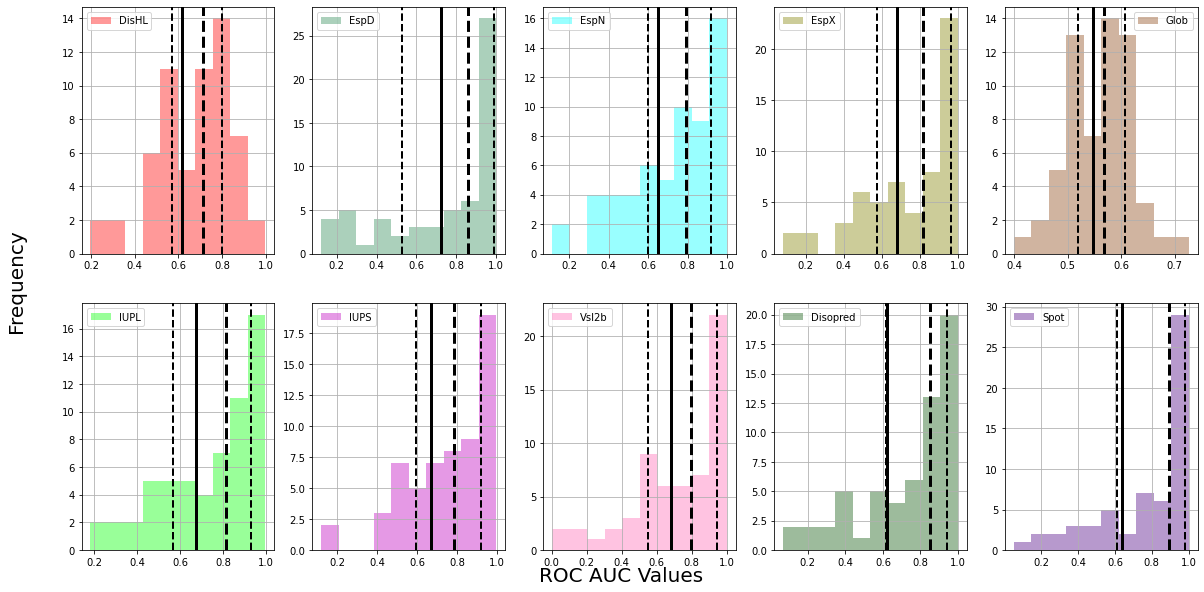

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,5,figsize=(20,10))

AUCs=AUCs_DisHL
sns.distplot(AUCs, color="r",bins=10, hist=True, kde=False, label="DisHL",ax=ax[0, 0],kde_kws={'clip': (0.0, 1.0)})
ax[0, 0].axvline(x=0.614,color='k',ls='-',linewidth=3)
ax[0, 0].grid()
ax[0, 0].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[0, 0].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[0, 0].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[0, 0].legend()
#######################################################################################
AUCs=AUCs_EspD
sns.distplot(AUCs_EspD, bins=10, hist=True, kde=False, color="seagreen", label="EspD",ax=ax[0, 1],kde_kws={'clip': (0.0, 1.0)})
ax[0, 1].axvline(x=0.724, color='k',ls='-',linewidth=3)
ax[0, 1].grid()
ax[0, 1].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[0, 1].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[0, 1].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[0, 1].legend()
#######################################################################################
AUCs=AUCs_EspN
sns.distplot(AUCs_EspN, bins=10, hist=True, kde=False, color="aqua", label="EspN",ax=ax[0, 2],kde_kws={'clip': (0.0, 1.0)})
ax[0, 2].axvline(x=0.652, color='k',ls='-',linewidth=3)
ax[0, 2].grid()
ax[0, 2].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[0, 2].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[0, 2].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[0, 2].legend()
#######################################################################################
AUCs=AUCs_EspX
sns.distplot(AUCs_EspX, bins=10, hist=True, kde=False, color="olive", label="EspX",ax=ax[0, 3],kde_kws={'clip': (0.0, 1.0)})
ax[0, 3].axvline(x=0.681, color='k',ls='-',linewidth=3)
ax[0, 3].grid()
ax[0, 3].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[0, 3].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[0, 3].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[0, 3].legend()
#######################################################################################
AUCs=AUCs_Glob
sns.distplot(AUCs_Glob,bins=10, hist=True, kde=False, color="saddlebrown", label="Glob",ax=ax[0, 4],kde_kws={'clip': (0.0, 1.0)})
ax[0, 4].axvline(x=0.548,color='k',ls='-',linewidth=3)
ax[0, 4].grid()
ax[0, 4].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[0, 4].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[0, 4].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[0, 4].legend()
#######################################################################################
AUCs=AUCs_IUPL
sns.distplot(AUCs_IUPL,bins=10, hist=True, kde=False, color="lime", label="IUPL",ax=ax[1, 0],kde_kws={'clip': (0.0, 1.0)})
ax[1, 0].axvline(x=0.673,color='k',ls='-',linewidth=3)
ax[1, 0].grid()
ax[1, 0].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[1, 0].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[1, 0].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[1, 0].legend()
#######################################################################################
AUCs=AUCs_IUPS
sns.distplot(AUCs_IUPS,bins=10, hist=True, kde=False, color="m", label="IUPS",ax=ax[1, 1],kde_kws={'clip': (0.0, 1.0)})
ax[1, 1].axvline(x=0.669,color='k',ls='-',linewidth=3)
ax[1, 1].grid()
ax[1, 1].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[1, 1].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[1, 1].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[1, 1].legend()
#######################################################################################
AUCs=AUCs_Vsl2b
sns.distplot(AUCs_Vsl2b,bins=10, hist=True, kde=False, color="hotpink", label="Vsl2b",ax=ax[1, 2],kde_kws={'clip': (0.0, 1.0)})
ax[1, 2].axvline(x=0.681,color='k',ls='-',linewidth=3)
ax[1, 2].grid()
ax[1, 2].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[1, 2].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[1, 2].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[1, 2].legend()
#######################################################################################
AUCs=AUCs_Disopred
sns.distplot(AUCs_Disopred, bins=10, hist=True, kde=False, color="#0b5509", label="Disopred",ax=ax[1, 3],kde_kws={'clip': (0.0, 1.0)})
ax[1, 3].axvline(x=0.622, color='k',ls='-',linewidth=3)
ax[1, 3].grid()
ax[1, 3].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[1, 3].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[1, 3].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[1, 3].legend()
#######################################################################################
AUCs=AUCs_Spot
sns.distplot(AUCs_Spot, bins=10, hist=True, kde=False, color="indigo", label="Spot",ax=ax[1, 4],kde_kws={'clip': (0.0, 1.0)})
ax[1, 4].axvline(x=0.639, color='k',ls='-',linewidth=3)
ax[1, 4].grid()
ax[1, 4].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[1, 4].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[1, 4].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[1, 4].legend()


fig=ax[0,0].figure
fig.text(0.5,0.09, "ROC AUC Values", ha="center", va="center", fontsize=20)
fig.text(0.08,0.5, "Frequency", ha="center", va="center", rotation=90, fontsize=20)
#plt.savefig('Protein_OriDistAUCs.tiff', bbox_inches='tight',quality =95,orientation ='landscape',dpi =800)
plt.show() 

In [49]:
import random
import scipy
Median_List=[np.median(AUCs_DisHL),np.median(AUCs_EspD),np.median(AUCs_EspN),np.median(AUCs_EspX),np.median(AUCs_Glob),np.median(AUCs_IUPL),np.median(AUCs_IUPS),np.median(AUCs_Vsl2b),np.median(AUCs_Disopred),np.median(AUCs_Spot)]
maxpos = Median_List.index(max(Median_List))
DisHL_medians=[]
EspD_medians=[]
EspN_medians=[]
EspX_medians=[]
Glob_medians=[]
IUPL_medians=[]
IUPS_medians=[]
Vsl2b_medians=[]
Disopred_medians=[]
Spot_medians=[]
Range=np.arange(len(AUCs_DisHL))
g=0
for g in range(0,100,1):
               Random_50Percent=np.random.choice(Range,(len(AUCs_DisHL)//10)*5,replace=True)
               k=0
               DisHL_sample=[]
               EspD_sample=[]
               EspN_sample=[]
               EspX_sample=[]
               Glob_sample=[]
               IUPL_sample=[]
               IUPS_sample=[]
               Vsl2b_sample=[]
               Disopred_sample=[]
               Spot_sample=[]
               for k in Random_50Percent:
                                  DisHL_sample.append(AUCs_DisHL[k]) 
                                  EspD_sample.append(AUCs_EspD[k])
                                  EspN_sample.append(AUCs_EspN[k])
                                  EspX_sample.append(AUCs_EspX[k])
                                  Glob_sample.append(AUCs_Glob[k])
                                  IUPL_sample.append(AUCs_IUPL[k])
                                  IUPS_sample.append(AUCs_IUPS[k])
                                  Vsl2b_sample.append(AUCs_Vsl2b[k])
                                  Disopred_sample.append(AUCs_Disopred[k])
                                  Spot_sample.append(AUCs_Spot[k])
               DisHL_medians.append(np.median(DisHL_sample))
               EspD_medians.append(np.median(EspD_sample))
               EspN_medians.append(np.median(EspN_sample))
               EspX_medians.append(np.median(EspX_sample))
               Glob_medians.append(np.median(Glob_sample))
               IUPL_medians.append(np.median(IUPL_sample))
               IUPS_medians.append(np.median(IUPS_sample))
               Vsl2b_medians.append(np.median(Vsl2b_sample))
               Disopred_medians.append(np.median(Disopred_sample))
               Spot_medians.append(np.median(Spot_sample))
Sample_List=[DisHL_medians,EspD_medians,EspN_medians,EspX_medians,Glob_medians,IUPL_medians,IUPS_medians,Vsl2b_medians,Disopred_medians,Spot_medians]
P_Values=[]
b=0
for b in range(0,len(Sample_List),1):
             A=Sample_List[maxpos]
             B=Sample_List[b]
             test_stat, critical_values, siglevel = scipy.stats.anderson(A, 'norm')
             is_normal_A = test_stat < critical_values[2]
             test_stat, critical_values, siglevel = scipy.stats.anderson(B, 'norm')
             is_normal_B = test_stat < critical_values[2]
             if is_normal_A and is_normal_B:
                # if both of them are normally distributed, we use t-test
                test_stat, p_val = scipy.stats.ttest_ind(A, B)
             else:
               # else we do Anderson-Darling rank-sum test
               t_stat, p_val = scipy.stats.ranksums(A, B)
             P_Values.append(p_val)
PoteinAUC_Pvalues=pd.DataFrame({'Predictor':['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'],                
                                'P Values':P_Values})
PoteinAUC_Pvalues

,Predictor,P Values
0,DisHL,1.646223e-32
1,EspD,2.758226e-01
2,EspN,3.683420e-21
3,EspX,8.534666e-12
4,Glob,2.523939e-34
5,IUPL,1.423470e-14
6,IUPS,6.823333e-18
7,Vsl2b,7.590821e-18
8,Disopred,2.161642e-07
9,Spot,1.000000e+00


In [50]:
Dataset_P,Dataset_Median=Dataset_AUCSigni(Protein_Index)
Dataset_P

,Predictor,P Values
0,DisHL,7.639140e-69
1,EspD,1.000000e+00
2,EspN,6.099696e-40
3,EspX,8.436191e-19
4,Glob,5.767351e-128
5,IUPL,1.607802e-20
6,IUPS,2.181817e-30
7,Vsl2b,7.579522e-26
8,Disopred,6.839744e-32
9,Spot,7.246038e-23


In [51]:
Dataset_Median

,Predictor,Medians
0,DisHL,0.678170
1,EspD,0.827430
2,EspN,0.727074
3,EspX,0.772298
4,Glob,0.559305
5,IUPL,0.772012
6,IUPS,0.754258
7,Vsl2b,0.756194
8,Disopred,0.682219
9,Spot,0.748031


In [52]:
AUC_Collection=pd.DataFrame({'AUCs_DisHL':AUCs_DisHL,
                             'AUCs_EspD':AUCs_EspD,
                             'AUCs_EspN':AUCs_EspN,
                             'AUCs_EspX':AUCs_EspX,
                             'AUCs_Glob':AUCs_Glob,
                             'AUCs_IUPL':AUCs_IUPL,
                             'AUCs_IUPS':AUCs_IUPS,
                             'AUCs_Vsl2b':AUCs_Vsl2b,
                             'AUCs_Disopred':AUCs_Disopred,
                             'AUCs_Spot':AUCs_Spot}) 
Picked_Name =[AUC_Collection.columns[i].tolist() for i in AUC_Collection.values == AUC_Collection.max(axis=1)[:,None]]
  
DisHL_Count=0
EspD_Count=0
EspN_Count=0
EspX_Count=0
Glob_Count=0
IUPL_Count=0
IUPS_Count=0
Vsl2b_Count=0
Disopred_Count=0
Spot_Count=0
b=0
for b in range(0,len(Picked_Name),1):
          if 'AUCs_DisHL'in Picked_Name[b]:DisHL_Count=DisHL_Count+1
          if 'AUCs_EspD'in Picked_Name[b]:EspD_Count=EspD_Count+1
          if 'AUCs_EspN'in Picked_Name[b]:EspN_Count=EspN_Count+1
          if 'AUCs_EspX'in Picked_Name[b]:EspX_Count=EspX_Count+1
          if 'AUCs_Glob'in Picked_Name[b]:Glob_Count=Glob_Count+1
          if 'AUCs_IUPL'in Picked_Name[b]:IUPL_Count=IUPL_Count+1
          if 'AUCs_IUPS'in Picked_Name[b]:IUPS_Count=IUPS_Count+1
          if 'AUCs_Vsl2b'in Picked_Name[b]:Vsl2b_Count=Vsl2b_Count+1
          if 'AUCs_Disopred'in Picked_Name[b]:Disopred_Count=Disopred_Count+1
          if 'AUCs_Spot'in Picked_Name[b]:Spot_Count=Spot_Count+1  
            
Top_Performer=pd.DataFrame({'Predictor':['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'],                
                            'Best Fraction':[DisHL_Count/len(Picked_Name),
                                             EspD_Count/len(Picked_Name),
                                             EspN_Count/len(Picked_Name),
                                             EspX_Count/len(Picked_Name),
                                             Glob_Count/len(Picked_Name),
                                             IUPL_Count/len(Picked_Name),
                                             IUPS_Count/len(Picked_Name),
                                             Vsl2b_Count/len(Picked_Name),
                                             Disopred_Count/len(Picked_Name),
                                             Spot_Count/len(Picked_Name)],
                               'color':[300,30,150,90,240,210,270,180,120,60]})
                                         
Top_Performer

,Predictor,Best Fraction,color
0,DisHL,0.016667,300
1,EspD,0.350000,30
2,EspN,0.066667,150
3,EspX,0.083333,90
4,Glob,0.033333,240
5,IUPL,0.016667,210
6,IUPS,0.033333,270
7,Vsl2b,0.150000,180
8,Disopred,0.066667,120
9,Spot,0.200000,60


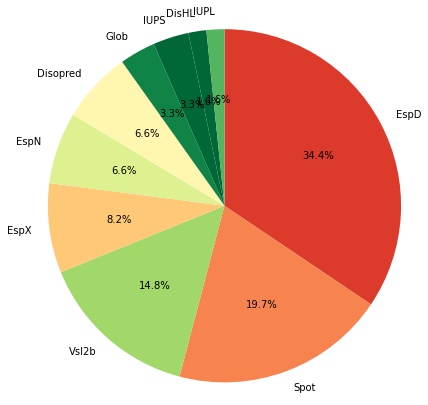

In [53]:
import matplotlib.pyplot as plt
import matplotlib
cmap = matplotlib.cm.get_cmap('RdYlGn')
Top_Performer = Top_Performer.sort_values(by=['Best Fraction'], ascending=False)
labels =Top_Performer.iloc[:,(0)].values
sizes = Top_Performer.iloc[:,(1)].values
colorcodes=Top_Performer.iloc[:,(2)].values
explode = (0.0, 0.0, 0.0, 0.0,0.0,0.0,0.0,0.0,0.0,0.0)  
colorbar=[cmap(colorcodes[0]),cmap(colorcodes[1]),cmap(colorcodes[2]),cmap(colorcodes[3]),cmap(colorcodes[4]),cmap(colorcodes[5]),cmap(colorcodes[6]),cmap(colorcodes[7]),cmap(colorcodes[8]),cmap(colorcodes[9])]
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90,counterclock=False,colors=colorbar)
ax1.axis('equal')  
#plt.savefig('BestFraction_OriProt.tiff', bbox_inches='tight',quality =50,orientation ='portrait',dpi =400)
plt.show()

# NUC Performances

In [54]:
AUCs_DisHL,   DisHL=Perfrom_Calc(NUC_Index,DisHLScore_byProteins,DisHLBinary_byProteins,'DisHL')
AUCs_EspD,    EspD=Perfrom_Calc(NUC_Index,EspDScore_byProteins,EspDBinary_byProteins,'EspD')
AUCs_EspN,    EspN=Perfrom_Calc(NUC_Index,EspNScore_byProteins,EspNBinary_byProteins,'EspN')
AUCs_EspX,    EspX=Perfrom_Calc(NUC_Index,EspXScore_byProteins,EspXBinary_byProteins,'EspX')
AUCs_Glob,    Glob=Perfrom_Calc(NUC_Index,GlobScore_byProteins,GlobBinary_byProteins,'Glob')
AUCs_IUPL,    IUPL=Perfrom_Calc(NUC_Index,IUPLScore_byProteins,IUPLBinary_byProteins,'IUPL')
AUCs_IUPS,    IUPS=Perfrom_Calc(NUC_Index,IUPSScore_byProteins,IUPSBinary_byProteins,'IUPS')
AUCs_Vsl2b,   Vsl2b=Perfrom_Calc(NUC_Index,Vsl2bScore_byProteins,Vsl2bBinary_byProteins,'Vsl2b')
AUCs_Disopred,Disopred=Perfrom_Calc(NUC_Index,DisopredScore_byProteins,DisopredBinary_byProteins,'Disopred')
AUCs_Spot,    Spot=Perfrom_Calc(NUC_Index,SpotScore_byProteins,SpotBinary_byProteins,'Spot')

C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846

In [55]:
len(NUC_Index)

15

In [56]:
frames = [DisHL, EspD, EspN,EspX,Glob,IUPL,IUPS,Vsl2b,Disopred,Spot]
result = pd.concat(frames)
result.astype(float).round(3)

,AUC,PR,ACC,Sen,MCC
DisHL,0.774,0.372,0.795,0.391,0.182
EspD,0.616,0.349,0.818,0.103,0.000
EspN,0.712,0.412,0.780,0.588,0.161
EspX,0.804,0.416,0.849,0.556,0.243
Glob,0.574,0.251,0.563,0.407,0.066
IUPL,0.775,0.395,0.791,0.539,0.192
IUPS,0.785,0.375,0.829,0.438,0.221
Vsl2b,0.785,0.251,0.844,0.829,0.164
Disopred,0.858,0.233,0.772,0.618,0.268
Spot,0.835,0.280,0.836,0.615,0.255


In [57]:
Protein_Dataset=Calc_Dataset(NUC_Index)
Protein_Dataset.astype(float).round(3)

,AUC,PR,Sen,FPR,MCC
DisHL,0.755,0.548,0.486,0.123,0.388
EspD,0.843,0.687,0.446,0.058,0.466
EspN,0.757,0.493,0.765,0.326,0.390
EspX,0.835,0.583,0.692,0.142,0.536
Glob,0.556,0.298,0.407,0.341,0.061
IUPL,0.804,0.571,0.685,0.194,0.463
IUPS,0.800,0.575,0.580,0.145,0.437
Vsl2b,0.796,0.522,0.834,0.396,0.387
Disopred,0.789,0.500,0.720,0.182,0.507
Spot,0.874,0.752,0.814,0.185,0.581


In [58]:
AUCs_DisHL.count(np.nan)

5

In [59]:
Order_Count= [] 
Disorder_Fraction=[]
Length=[]
c=0
for c in NUC_Index:
                 order=0
                 disorder =0
                 Annotation=Disorder_Annotations[c]
                 Length.append(len(Annotation))
                 b=0
                 for b in range(0, len(Annotation), 1):
                                      if Annotation[b] == 0: order = order+1
                                      elif Annotation[b] == 1: disorder = disorder+1
                 Order_Count.append(order)
                 #if disorder/len(Annotation)<1.0: 
                 Disorder_Fraction.append(disorder/len(Annotation))
NUC_Fractions=Disorder_Fraction

In [60]:
AUCs_DisHL= [x for x in AUCs_DisHL if ~np.isnan(x)]
AUCs_EspD= [x for x in AUCs_EspD if ~np.isnan(x)]
AUCs_EspN= [x for x in AUCs_EspN if ~np.isnan(x)]
AUCs_EspX= [x for x in AUCs_EspX if ~np.isnan(x)]
AUCs_Glob= [x for x in AUCs_Glob if ~np.isnan(x)]
AUCs_IUPL= [x for x in AUCs_IUPL if ~np.isnan(x)]
AUCs_IUPS= [x for x in AUCs_IUPS if ~np.isnan(x)]
AUCs_Vsl2b= [x for x in AUCs_Vsl2b if ~np.isnan(x)]
AUCs_Disopred= [x for x in AUCs_Disopred if ~np.isnan(x)]
AUCs_Spot= [x for x in AUCs_Spot if ~np.isnan(x)]

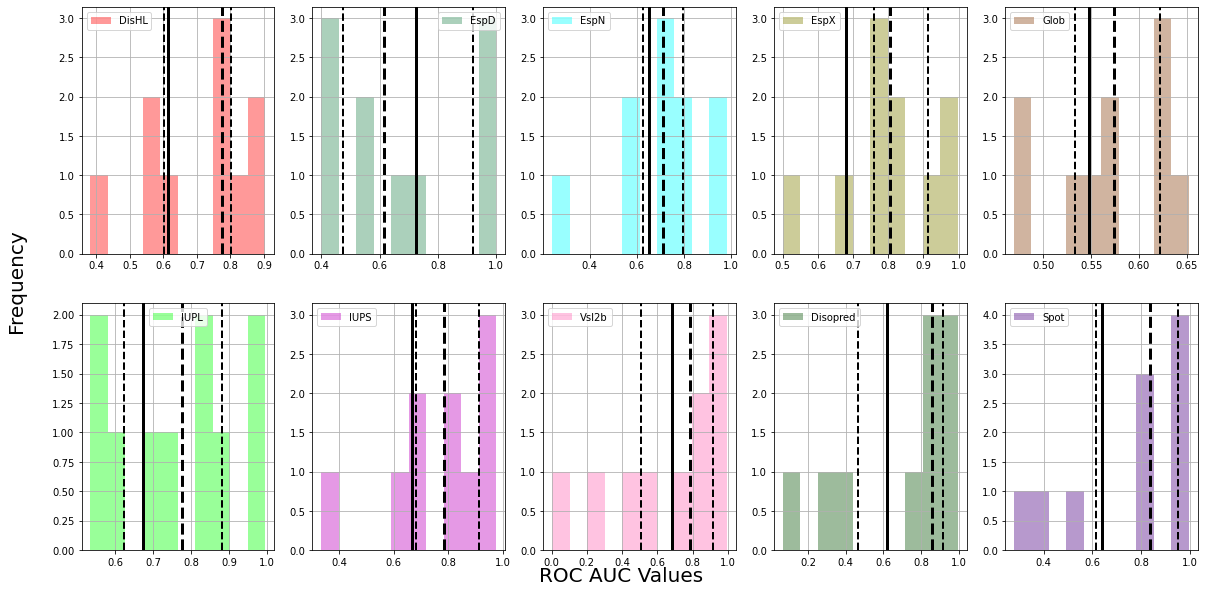

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,5,figsize=(20,10))

AUCs=AUCs_DisHL
sns.distplot(AUCs, color="r",bins=10, hist=True, kde=False, label="DisHL",ax=ax[0, 0],kde_kws={'clip': (0.0, 1.0)})
ax[0, 0].axvline(x=0.614,color='k',ls='-',linewidth=3)
ax[0, 0].grid()
ax[0, 0].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[0, 0].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[0, 0].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[0, 0].legend()
#######################################################################################
AUCs=AUCs_EspD
sns.distplot(AUCs_EspD, bins=10, hist=True, kde=False, color="seagreen", label="EspD",ax=ax[0, 1],kde_kws={'clip': (0.0, 1.0)})
ax[0, 1].axvline(x=0.724, color='k',ls='-',linewidth=3)
ax[0, 1].grid()
ax[0, 1].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[0, 1].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[0, 1].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[0, 1].legend()
#######################################################################################
AUCs=AUCs_EspN
sns.distplot(AUCs_EspN, bins=10, hist=True, kde=False, color="aqua", label="EspN",ax=ax[0, 2],kde_kws={'clip': (0.0, 1.0)})
ax[0, 2].axvline(x=0.652, color='k',ls='-',linewidth=3)
ax[0, 2].grid()
ax[0, 2].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[0, 2].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[0, 2].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[0, 2].legend()
#######################################################################################
AUCs=AUCs_EspX
sns.distplot(AUCs_EspX, bins=10, hist=True, kde=False, color="olive", label="EspX",ax=ax[0, 3],kde_kws={'clip': (0.0, 1.0)})
ax[0, 3].axvline(x=0.681, color='k',ls='-',linewidth=3)
ax[0, 3].grid()
ax[0, 3].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[0, 3].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[0, 3].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[0, 3].legend()
#######################################################################################
AUCs=AUCs_Glob
sns.distplot(AUCs_Glob,bins=10, hist=True, kde=False, color="saddlebrown", label="Glob",ax=ax[0, 4],kde_kws={'clip': (0.0, 1.0)})
ax[0, 4].axvline(x=0.548,color='k',ls='-',linewidth=3)
ax[0, 4].grid()
ax[0, 4].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[0, 4].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[0, 4].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[0, 4].legend()
#######################################################################################
AUCs=AUCs_IUPL
sns.distplot(AUCs_IUPL,bins=10, hist=True, kde=False, color="lime", label="IUPL",ax=ax[1, 0],kde_kws={'clip': (0.0, 1.0)})
ax[1, 0].axvline(x=0.673,color='k',ls='-',linewidth=3)
ax[1, 0].grid()
ax[1, 0].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[1, 0].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[1, 0].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[1, 0].legend()
#######################################################################################
AUCs=AUCs_IUPS
sns.distplot(AUCs_IUPS,bins=10, hist=True, kde=False, color="m", label="IUPS",ax=ax[1, 1],kde_kws={'clip': (0.0, 1.0)})
ax[1, 1].axvline(x=0.669,color='k',ls='-',linewidth=3)
ax[1, 1].grid()
ax[1, 1].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[1, 1].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[1, 1].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[1, 1].legend()
#######################################################################################
AUCs=AUCs_Vsl2b
sns.distplot(AUCs_Vsl2b,bins=10, hist=True, kde=False, color="hotpink", label="Vsl2b",ax=ax[1, 2],kde_kws={'clip': (0.0, 1.0)})
ax[1, 2].axvline(x=0.681,color='k',ls='-',linewidth=3)
ax[1, 2].grid()
ax[1, 2].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[1, 2].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[1, 2].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[1, 2].legend()
#######################################################################################
AUCs=AUCs_Disopred
sns.distplot(AUCs_Disopred, bins=10, hist=True, kde=False, color="#0b5509", label="Disopred",ax=ax[1, 3],kde_kws={'clip': (0.0, 1.0)})
ax[1, 3].axvline(x=0.622, color='k',ls='-',linewidth=3)
ax[1, 3].grid()
ax[1, 3].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[1, 3].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[1, 3].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[1, 3].legend()
#######################################################################################
AUCs=AUCs_Spot
sns.distplot(AUCs_Spot, bins=10, hist=True, kde=False, color="indigo", label="Spot",ax=ax[1, 4],kde_kws={'clip': (0.0, 1.0)})
ax[1, 4].axvline(x=0.639, color='k',ls='-',linewidth=3)
ax[1, 4].grid()
ax[1, 4].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[1, 4].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[1, 4].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[1, 4].legend()


fig=ax[0,0].figure
fig.text(0.5,0.09, "ROC AUC Values", ha="center", va="center", fontsize=20)
fig.text(0.08,0.5, "Frequency", ha="center", va="center", rotation=90, fontsize=20)
#plt.savefig('Protein_OriDistAUCs.tiff', bbox_inches='tight',quality =95,orientation ='landscape',dpi =800)
plt.show() 

In [62]:
import random
import scipy
Median_List=[np.median(AUCs_DisHL),np.median(AUCs_EspD),np.median(AUCs_EspN),np.median(AUCs_EspX),np.median(AUCs_Glob),np.median(AUCs_IUPL),np.median(AUCs_IUPS),np.median(AUCs_Vsl2b),np.median(AUCs_Disopred),np.median(AUCs_Spot)]
maxpos = Median_List.index(max(Median_List))
DisHL_medians=[]
EspD_medians=[]
EspN_medians=[]
EspX_medians=[]
Glob_medians=[]
IUPL_medians=[]
IUPS_medians=[]
Vsl2b_medians=[]
Disopred_medians=[]
Spot_medians=[]
Range=np.arange(len(AUCs_DisHL))
g=0
for g in range(0,100,1):
               Random_50Percent=np.random.choice(Range,(len(AUCs_DisHL)//10)*5,replace=True)
               k=0
               DisHL_sample=[]
               EspD_sample=[]
               EspN_sample=[]
               EspX_sample=[]
               Glob_sample=[]
               IUPL_sample=[]
               IUPS_sample=[]
               Vsl2b_sample=[]
               Disopred_sample=[]
               Spot_sample=[]
               for k in Random_50Percent:
                                  DisHL_sample.append(AUCs_DisHL[k]) 
                                  EspD_sample.append(AUCs_EspD[k])
                                  EspN_sample.append(AUCs_EspN[k])
                                  EspX_sample.append(AUCs_EspX[k])
                                  Glob_sample.append(AUCs_Glob[k])
                                  IUPL_sample.append(AUCs_IUPL[k])
                                  IUPS_sample.append(AUCs_IUPS[k])
                                  Vsl2b_sample.append(AUCs_Vsl2b[k])
                                  Disopred_sample.append(AUCs_Disopred[k])
                                  Spot_sample.append(AUCs_Spot[k])
               DisHL_medians.append(np.median(DisHL_sample))
               EspD_medians.append(np.median(EspD_sample))
               EspN_medians.append(np.median(EspN_sample))
               EspX_medians.append(np.median(EspX_sample))
               Glob_medians.append(np.median(Glob_sample))
               IUPL_medians.append(np.median(IUPL_sample))
               IUPS_medians.append(np.median(IUPS_sample))
               Vsl2b_medians.append(np.median(Vsl2b_sample))
               Disopred_medians.append(np.median(Disopred_sample))
               Spot_medians.append(np.median(Spot_sample))
Sample_List=[DisHL_medians,EspD_medians,EspN_medians,EspX_medians,Glob_medians,IUPL_medians,IUPS_medians,Vsl2b_medians,Disopred_medians,Spot_medians]
P_Values=[]
b=0
for b in range(0,len(Sample_List),1):
             A=Sample_List[maxpos]
             B=Sample_List[b]
             test_stat, critical_values, siglevel = scipy.stats.anderson(A, 'norm')
             is_normal_A = test_stat < critical_values[2]
             test_stat, critical_values, siglevel = scipy.stats.anderson(B, 'norm')
             is_normal_B = test_stat < critical_values[2]
             if is_normal_A and is_normal_B:
                # if both of them are normally distributed, we use t-test
                test_stat, p_val = scipy.stats.ttest_ind(A, B)
             else:
               # else we do Anderson-Darling rank-sum test
               t_stat, p_val = scipy.stats.ranksums(A, B)
             P_Values.append(p_val)
PoteinAUC_Pvalues=pd.DataFrame({'Predictor':['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'],                
                                'P Values':P_Values})
PoteinAUC_Pvalues

,Predictor,P Values
0,DisHL,1.260744e-11
1,EspD,1.102532e-09
2,EspN,2.060254e-13
3,EspX,1.421733e-04
4,Glob,9.772109e-17
5,IUPL,3.441670e-04
6,IUPS,1.764106e-04
7,Vsl2b,2.693816e-04
8,Disopred,1.000000e+00
9,Spot,4.590896e-01


In [65]:
Dataset_P,Dataset_Median=Dataset_AUCSigni(NUC_Index)
Dataset_P

,Predictor,P Values
0,DisHL,2.557200e-10
1,EspD,1.068235e-01
2,EspN,2.768535e-09
3,EspX,4.047344e-01
4,Glob,7.427797e-29
5,IUPL,6.490086e-03
6,IUPS,1.719315e-03
7,Vsl2b,3.877390e-05
8,Disopred,4.481408e-08
9,Spot,1.000000e+00


In [66]:
Dataset_Median

,Predictor,Medians
0,DisHL,0.774597
1,EspD,0.845332
2,EspN,0.759573
3,EspX,0.862071
4,Glob,0.554400
5,IUPL,0.834534
6,IUPS,0.832352
7,Vsl2b,0.807522
8,Disopred,0.787224
9,Spot,0.874368


In [67]:
AUC_Collection=pd.DataFrame({'AUCs_DisHL':AUCs_DisHL,
                             'AUCs_EspD':AUCs_EspD,
                             'AUCs_EspN':AUCs_EspN,
                             'AUCs_EspX':AUCs_EspX,
                             'AUCs_Glob':AUCs_Glob,
                             'AUCs_IUPL':AUCs_IUPL,
                             'AUCs_IUPS':AUCs_IUPS,
                             'AUCs_Vsl2b':AUCs_Vsl2b,
                             'AUCs_Disopred':AUCs_Disopred,
                             'AUCs_Spot':AUCs_Spot}) 
Picked_Name =[AUC_Collection.columns[i].tolist() for i in AUC_Collection.values == AUC_Collection.max(axis=1)[:,None]]
  
DisHL_Count=0
EspD_Count=0
EspN_Count=0
EspX_Count=0
Glob_Count=0
IUPL_Count=0
IUPS_Count=0
Vsl2b_Count=0
Disopred_Count=0
Spot_Count=0
b=0
for b in range(0,len(Picked_Name),1):
          if 'AUCs_DisHL'in Picked_Name[b]:DisHL_Count=DisHL_Count+1
          if 'AUCs_EspD'in Picked_Name[b]:EspD_Count=EspD_Count+1
          if 'AUCs_EspN'in Picked_Name[b]:EspN_Count=EspN_Count+1
          if 'AUCs_EspX'in Picked_Name[b]:EspX_Count=EspX_Count+1
          if 'AUCs_Glob'in Picked_Name[b]:Glob_Count=Glob_Count+1
          if 'AUCs_IUPL'in Picked_Name[b]:IUPL_Count=IUPL_Count+1
          if 'AUCs_IUPS'in Picked_Name[b]:IUPS_Count=IUPS_Count+1
          if 'AUCs_Vsl2b'in Picked_Name[b]:Vsl2b_Count=Vsl2b_Count+1
          if 'AUCs_Disopred'in Picked_Name[b]:Disopred_Count=Disopred_Count+1
          if 'AUCs_Spot'in Picked_Name[b]:Spot_Count=Spot_Count+1  
            
Top_Performer=pd.DataFrame({'Predictor':['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'],                
                            'Best Fraction':[DisHL_Count/len(Picked_Name),
                                             EspD_Count/len(Picked_Name),
                                             EspN_Count/len(Picked_Name),
                                             EspX_Count/len(Picked_Name),
                                             Glob_Count/len(Picked_Name),
                                             IUPL_Count/len(Picked_Name),
                                             IUPS_Count/len(Picked_Name),
                                             Vsl2b_Count/len(Picked_Name),
                                             Disopred_Count/len(Picked_Name),
                                             Spot_Count/len(Picked_Name)],
                               'color':[300,30,150,90,240,210,270,180,120,60]})
                                         
Top_Performer

,Predictor,Best Fraction,color
0,DisHL,0.0,300
1,EspD,0.2,30
2,EspN,0.1,150
3,EspX,0.3,90
4,Glob,0.0,240
5,IUPL,0.0,210
6,IUPS,0.1,270
7,Vsl2b,0.0,180
8,Disopred,0.1,120
9,Spot,0.2,60


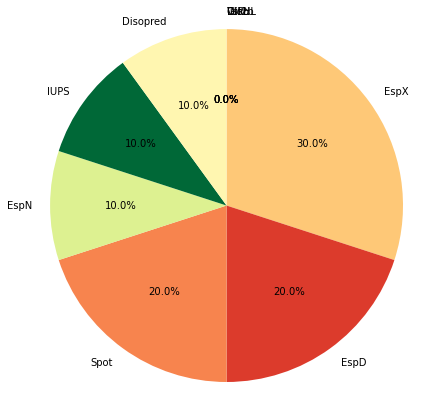

In [68]:
import matplotlib.pyplot as plt
import matplotlib
cmap = matplotlib.cm.get_cmap('RdYlGn')
Top_Performer = Top_Performer.sort_values(by=['Best Fraction'], ascending=False)
labels =Top_Performer.iloc[:,(0)].values
sizes = Top_Performer.iloc[:,(1)].values
colorcodes=Top_Performer.iloc[:,(2)].values
explode = (0.0, 0.0, 0.0, 0.0,0.0,0.0,0.0,0.0,0.0,0.0)  
colorbar=[cmap(colorcodes[0]),cmap(colorcodes[1]),cmap(colorcodes[2]),cmap(colorcodes[3]),cmap(colorcodes[4]),cmap(colorcodes[5]),cmap(colorcodes[6]),cmap(colorcodes[7]),cmap(colorcodes[8]),cmap(colorcodes[9])]
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90,counterclock=False,colors=colorbar)
ax1.axis('equal')  
#plt.savefig('BestFraction_OriProt.tiff', bbox_inches='tight',quality =50,orientation ='portrait',dpi =400)
plt.show()

# Overall Performances

In [69]:
AUCs_DisHL,   DisHL=Perfrom_Calc(Normal_Index,DisHLScore_byProteins,DisHLBinary_byProteins,'DisHL')
AUCs_EspD,    EspD=Perfrom_Calc(Normal_Index,EspDScore_byProteins,EspDBinary_byProteins,'EspD')
AUCs_EspN,    EspN=Perfrom_Calc(Normal_Index,EspNScore_byProteins,EspNBinary_byProteins,'EspN')
AUCs_EspX,    EspX=Perfrom_Calc(Normal_Index,EspXScore_byProteins,EspXBinary_byProteins,'EspX')
AUCs_Glob,    Glob=Perfrom_Calc(Normal_Index,GlobScore_byProteins,GlobBinary_byProteins,'Glob')
AUCs_IUPL,    IUPL=Perfrom_Calc(Normal_Index,IUPLScore_byProteins,IUPLBinary_byProteins,'IUPL')
AUCs_IUPS,    IUPS=Perfrom_Calc(Normal_Index,IUPSScore_byProteins,IUPSBinary_byProteins,'IUPS')
AUCs_Vsl2b,   Vsl2b=Perfrom_Calc(Normal_Index,Vsl2bScore_byProteins,Vsl2bBinary_byProteins,'Vsl2b')
AUCs_Disopred,Disopred=Perfrom_Calc(Normal_Index,DisopredScore_byProteins,DisopredBinary_byProteins,'Disopred')
AUCs_Spot,    Spot=Perfrom_Calc(Normal_Index,SpotScore_byProteins,SpotBinary_byProteins,'Spot')

C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846

C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846

C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846

In [70]:
frames = [DisHL, EspD, EspN,EspX,Glob,IUPL,IUPS,Vsl2b,Disopred,Spot]
result = pd.concat(frames)
result.astype(float).round(3)

,AUC,PR,ACC,Sen,MCC
DisHL,0.758,0.488,0.733,0.372,0.283
EspD,0.832,0.591,0.824,0.055,0.000
EspN,0.825,0.601,0.789,0.702,0.399
EspX,0.856,0.618,0.802,0.510,0.393
Glob,0.558,0.253,0.579,0.400,0.056
IUPL,0.851,0.650,0.812,0.593,0.350
IUPS,0.865,0.613,0.802,0.517,0.414
Vsl2b,0.883,0.662,0.782,0.906,0.379
Disopred,0.886,0.647,0.778,0.525,0.381
Spot,0.920,0.702,0.852,0.725,0.468


In [71]:
Protein_Dataset=Calc_Dataset(Normal_Index)
Protein_Dataset.astype(float).round(3)

,AUC,PR,Sen,FPR,MCC
DisHL,0.741,0.520,0.439,0.132,0.336
EspD,0.842,0.685,0.487,0.067,0.486
EspN,0.776,0.563,0.721,0.272,0.414
EspX,0.812,0.586,0.623,0.160,0.459
Glob,0.563,0.332,0.428,0.326,0.096
IUPL,0.806,0.625,0.693,0.206,0.463
IUPS,0.801,0.607,0.613,0.165,0.444
Vsl2b,0.805,0.611,0.845,0.399,0.404
Disopred,0.767,0.513,0.653,0.248,0.380
Spot,0.826,0.578,0.756,0.234,0.485


In [72]:
AUCs_DisHL.count(np.nan)

109

In [73]:
Order_Count= [] 
Disorder_Fraction=[]
Length=[]
c=0
for c in Normal_Index:
                 order=0
                 disorder =0
                 Annotation=Disorder_Annotations[c]
                 Length.append(len(Annotation))
                 b=0
                 for b in range(0, len(Annotation), 1):
                                      if Annotation[b] == 0: order = order+1
                                      elif Annotation[b] == 1: disorder = disorder+1
                 Order_Count.append(order)
                 #if disorder/len(Annotation)<1.0: 
                 Disorder_Fraction.append(disorder/len(Annotation))
Normal_Fractions=Disorder_Fraction

In [74]:
AUCs_DisHL= [x for x in AUCs_DisHL if ~np.isnan(x)]
AUCs_EspD= [x for x in AUCs_EspD if ~np.isnan(x)]
AUCs_EspN= [x for x in AUCs_EspN if ~np.isnan(x)]
AUCs_EspX= [x for x in AUCs_EspX if ~np.isnan(x)]
AUCs_Glob= [x for x in AUCs_Glob if ~np.isnan(x)]
AUCs_IUPL= [x for x in AUCs_IUPL if ~np.isnan(x)]
AUCs_IUPS= [x for x in AUCs_IUPS if ~np.isnan(x)]
AUCs_Vsl2b= [x for x in AUCs_Vsl2b if ~np.isnan(x)]
AUCs_Disopred= [x for x in AUCs_Disopred if ~np.isnan(x)]
AUCs_Spot= [x for x in AUCs_Spot if ~np.isnan(x)]

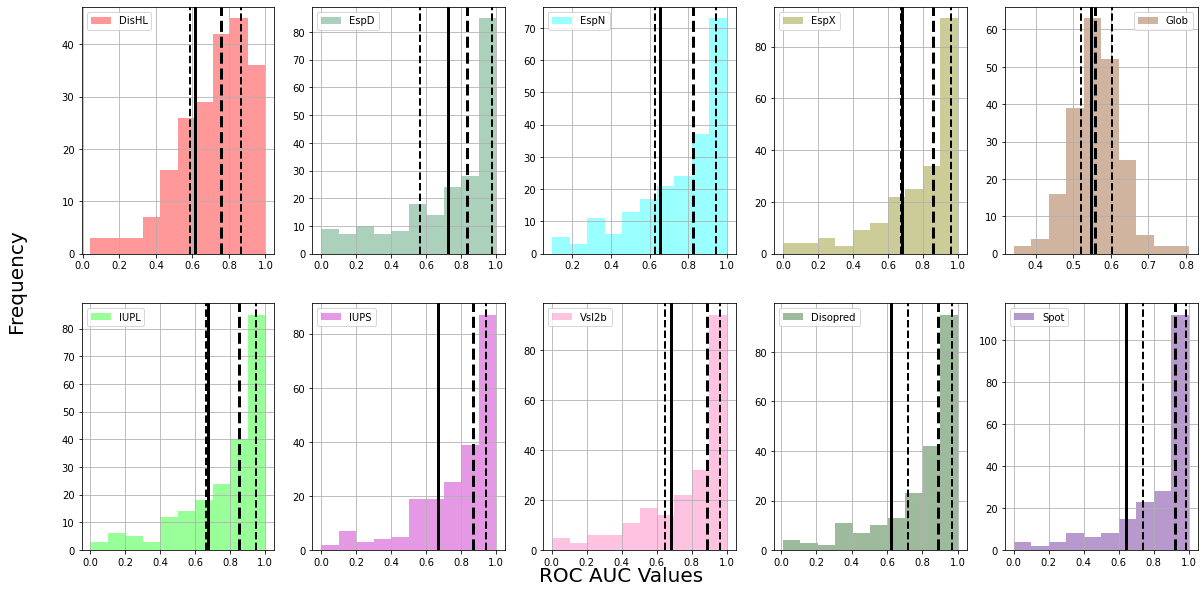

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,5,figsize=(20,10))

AUCs=AUCs_DisHL
sns.distplot(AUCs, color="r",bins=10, hist=True, kde=False, label="DisHL",ax=ax[0, 0],kde_kws={'clip': (0.0, 1.0)})
ax[0, 0].axvline(x=0.614,color='k',ls='-',linewidth=3)
ax[0, 0].grid()
ax[0, 0].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[0, 0].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[0, 0].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[0, 0].legend()
#######################################################################################
AUCs=AUCs_EspD
sns.distplot(AUCs_EspD, bins=10, hist=True, kde=False, color="seagreen", label="EspD",ax=ax[0, 1],kde_kws={'clip': (0.0, 1.0)})
ax[0, 1].axvline(x=0.724, color='k',ls='-',linewidth=3)
ax[0, 1].grid()
ax[0, 1].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[0, 1].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[0, 1].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[0, 1].legend()
#######################################################################################
AUCs=AUCs_EspN
sns.distplot(AUCs_EspN, bins=10, hist=True, kde=False, color="aqua", label="EspN",ax=ax[0, 2],kde_kws={'clip': (0.0, 1.0)})
ax[0, 2].axvline(x=0.652, color='k',ls='-',linewidth=3)
ax[0, 2].grid()
ax[0, 2].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[0, 2].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[0, 2].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[0, 2].legend()
#######################################################################################
AUCs=AUCs_EspX
sns.distplot(AUCs_EspX, bins=10, hist=True, kde=False, color="olive", label="EspX",ax=ax[0, 3],kde_kws={'clip': (0.0, 1.0)})
ax[0, 3].axvline(x=0.681, color='k',ls='-',linewidth=3)
ax[0, 3].grid()
ax[0, 3].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[0, 3].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[0, 3].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[0, 3].legend()
#######################################################################################
AUCs=AUCs_Glob
sns.distplot(AUCs_Glob,bins=10, hist=True, kde=False, color="saddlebrown", label="Glob",ax=ax[0, 4],kde_kws={'clip': (0.0, 1.0)})
ax[0, 4].axvline(x=0.548,color='k',ls='-',linewidth=3)
ax[0, 4].grid()
ax[0, 4].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[0, 4].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[0, 4].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[0, 4].legend()
#######################################################################################
AUCs=AUCs_IUPL
sns.distplot(AUCs_IUPL,bins=10, hist=True, kde=False, color="lime", label="IUPL",ax=ax[1, 0],kde_kws={'clip': (0.0, 1.0)})
ax[1, 0].axvline(x=0.673,color='k',ls='-',linewidth=3)
ax[1, 0].grid()
ax[1, 0].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[1, 0].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[1, 0].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[1, 0].legend()
#######################################################################################
AUCs=AUCs_IUPS
sns.distplot(AUCs_IUPS,bins=10, hist=True, kde=False, color="m", label="IUPS",ax=ax[1, 1],kde_kws={'clip': (0.0, 1.0)})
ax[1, 1].axvline(x=0.669,color='k',ls='-',linewidth=3)
ax[1, 1].grid()
ax[1, 1].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[1, 1].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[1, 1].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[1, 1].legend()
#######################################################################################
AUCs=AUCs_Vsl2b
sns.distplot(AUCs_Vsl2b,bins=10, hist=True, kde=False, color="hotpink", label="Vsl2b",ax=ax[1, 2],kde_kws={'clip': (0.0, 1.0)})
ax[1, 2].axvline(x=0.681,color='k',ls='-',linewidth=3)
ax[1, 2].grid()
ax[1, 2].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[1, 2].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[1, 2].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[1, 2].legend()
#######################################################################################
AUCs=AUCs_Disopred
sns.distplot(AUCs_Disopred, bins=10, hist=True, kde=False, color="#0b5509", label="Disopred",ax=ax[1, 3],kde_kws={'clip': (0.0, 1.0)})
ax[1, 3].axvline(x=0.622, color='k',ls='-',linewidth=3)
ax[1, 3].grid()
ax[1, 3].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[1, 3].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[1, 3].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[1, 3].legend()
#######################################################################################
AUCs=AUCs_Spot
sns.distplot(AUCs_Spot, bins=10, hist=True, kde=False, color="indigo", label="Spot",ax=ax[1, 4],kde_kws={'clip': (0.0, 1.0)})
ax[1, 4].axvline(x=0.639, color='k',ls='-',linewidth=3)
ax[1, 4].grid()
ax[1, 4].axvline(x=np.percentile(AUCs,25), color='k',ls='--', linewidth=2)
ax[1, 4].axvline(x=np.percentile(AUCs,50), color='k',ls='--', linewidth=3)
ax[1, 4].axvline(x=np.percentile(AUCs,75), color='k',ls='--', linewidth=2)
ax[1, 4].legend()


fig=ax[0,0].figure
fig.text(0.5,0.09, "ROC AUC Values", ha="center", va="center", fontsize=20)
fig.text(0.08,0.5, "Frequency", ha="center", va="center", rotation=90, fontsize=20)
#plt.savefig('Protein_OriDistAUCs.tiff', bbox_inches='tight',quality =95,orientation ='landscape',dpi =800)
plt.show() 

In [76]:
import random
import scipy
Median_List=[np.median(AUCs_DisHL),np.median(AUCs_EspD),np.median(AUCs_EspN),np.median(AUCs_EspX),np.median(AUCs_Glob),np.median(AUCs_IUPL),np.median(AUCs_IUPS),np.median(AUCs_Vsl2b),np.median(AUCs_Disopred),np.median(AUCs_Spot)]
maxpos = Median_List.index(max(Median_List))
DisHL_medians=[]
EspD_medians=[]
EspN_medians=[]
EspX_medians=[]
Glob_medians=[]
IUPL_medians=[]
IUPS_medians=[]
Vsl2b_medians=[]
Disopred_medians=[]
Spot_medians=[]
Range=np.arange(len(AUCs_DisHL))
g=0
for g in range(0,100,1):
               Random_50Percent=np.random.choice(Range,(len(AUCs_DisHL)//10)*5,replace=True)
               k=0
               DisHL_sample=[]
               EspD_sample=[]
               EspN_sample=[]
               EspX_sample=[]
               Glob_sample=[]
               IUPL_sample=[]
               IUPS_sample=[]
               Vsl2b_sample=[]
               Disopred_sample=[]
               Spot_sample=[]
               for k in Random_50Percent:
                                  DisHL_sample.append(AUCs_DisHL[k]) 
                                  EspD_sample.append(AUCs_EspD[k])
                                  EspN_sample.append(AUCs_EspN[k])
                                  EspX_sample.append(AUCs_EspX[k])
                                  Glob_sample.append(AUCs_Glob[k])
                                  IUPL_sample.append(AUCs_IUPL[k])
                                  IUPS_sample.append(AUCs_IUPS[k])
                                  Vsl2b_sample.append(AUCs_Vsl2b[k])
                                  Disopred_sample.append(AUCs_Disopred[k])
                                  Spot_sample.append(AUCs_Spot[k])
               DisHL_medians.append(np.median(DisHL_sample))
               EspD_medians.append(np.median(EspD_sample))
               EspN_medians.append(np.median(EspN_sample))
               EspX_medians.append(np.median(EspX_sample))
               Glob_medians.append(np.median(Glob_sample))
               IUPL_medians.append(np.median(IUPL_sample))
               IUPS_medians.append(np.median(IUPS_sample))
               Vsl2b_medians.append(np.median(Vsl2b_sample))
               Disopred_medians.append(np.median(Disopred_sample))
               Spot_medians.append(np.median(Spot_sample))
Sample_List=[DisHL_medians,EspD_medians,EspN_medians,EspX_medians,Glob_medians,IUPL_medians,IUPS_medians,Vsl2b_medians,Disopred_medians,Spot_medians]
P_Values=[]
b=0
for b in range(0,len(Sample_List),1):
             A=Sample_List[maxpos]
             B=Sample_List[b]
             test_stat, critical_values, siglevel = scipy.stats.anderson(A, 'norm')
             is_normal_A = test_stat < critical_values[2]
             test_stat, critical_values, siglevel = scipy.stats.anderson(B, 'norm')
             is_normal_B = test_stat < critical_values[2]
             if is_normal_A and is_normal_B:
                # if both of them are normally distributed, we use t-test
                test_stat, p_val = scipy.stats.ttest_ind(A, B)
             else:
               # else we do Anderson-Darling rank-sum test
               t_stat, p_val = scipy.stats.ranksums(A, B)
             P_Values.append(p_val)
PoteinAUC_Pvalues=pd.DataFrame({'Predictor':['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'],                
                                'P Values':P_Values})
PoteinAUC_Pvalues

,Predictor,P Values
0,DisHL,2.523939e-34
1,EspD,2.146648e-29
2,EspN,2.507686e-33
3,EspX,1.127660e-25
4,Glob,2.523939e-34
5,IUPL,6.982115e-31
6,IUPS,3.185511e-27
7,Vsl2b,4.236202e-21
8,Disopred,3.910618e-18
9,Spot,1.000000e+00


In [77]:
Dataset_P,Dataset_Median=Dataset_AUCSigni(Normal_Index)
Dataset_P

,Predictor,P Values
0,DisHL,6.705772e-93
1,EspD,1.000000e+00
2,EspN,3.355689e-57
3,EspX,7.123567e-20
4,Glob,4.747689e-194
5,IUPL,1.291926e-25
6,IUPS,8.242933e-33
7,Vsl2b,1.088421e-26
8,Disopred,1.913290e-52
9,Spot,4.803660e-05


In [78]:
Dataset_Median

,Predictor,Medians
0,DisHL,0.739234
1,EspD,0.839199
2,EspN,0.773457
3,EspX,0.807658
4,Glob,0.564361
5,IUPL,0.802927
6,IUPS,0.796847
7,Vsl2b,0.800153
8,Disopred,0.769843
9,Spot,0.824283


In [79]:
AUC_Collection=pd.DataFrame({'AUCs_DisHL':AUCs_DisHL,
                             'AUCs_EspD':AUCs_EspD,
                             'AUCs_EspN':AUCs_EspN,
                             'AUCs_EspX':AUCs_EspX,
                             'AUCs_Glob':AUCs_Glob,
                             'AUCs_IUPL':AUCs_IUPL,
                             'AUCs_IUPS':AUCs_IUPS,
                             'AUCs_Vsl2b':AUCs_Vsl2b,
                             'AUCs_Disopred':AUCs_Disopred,
                             'AUCs_Spot':AUCs_Spot}) 
Picked_Name =[AUC_Collection.columns[i].tolist() for i in AUC_Collection.values == AUC_Collection.max(axis=1)[:,None]]
  
DisHL_Count=0
EspD_Count=0
EspN_Count=0
EspX_Count=0
Glob_Count=0
IUPL_Count=0
IUPS_Count=0
Vsl2b_Count=0
Disopred_Count=0
Spot_Count=0
b=0
for b in range(0,len(Picked_Name),1):
          if 'AUCs_DisHL'in Picked_Name[b]:DisHL_Count=DisHL_Count+1
          if 'AUCs_EspD'in Picked_Name[b]:EspD_Count=EspD_Count+1
          if 'AUCs_EspN'in Picked_Name[b]:EspN_Count=EspN_Count+1
          if 'AUCs_EspX'in Picked_Name[b]:EspX_Count=EspX_Count+1
          if 'AUCs_Glob'in Picked_Name[b]:Glob_Count=Glob_Count+1
          if 'AUCs_IUPL'in Picked_Name[b]:IUPL_Count=IUPL_Count+1
          if 'AUCs_IUPS'in Picked_Name[b]:IUPS_Count=IUPS_Count+1
          if 'AUCs_Vsl2b'in Picked_Name[b]:Vsl2b_Count=Vsl2b_Count+1
          if 'AUCs_Disopred'in Picked_Name[b]:Disopred_Count=Disopred_Count+1
          if 'AUCs_Spot'in Picked_Name[b]:Spot_Count=Spot_Count+1  
            
Top_Performer=pd.DataFrame({'Predictor':['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'],                
                            'Best Fraction':[DisHL_Count/len(Picked_Name),
                                             EspD_Count/len(Picked_Name),
                                             EspN_Count/len(Picked_Name),
                                             EspX_Count/len(Picked_Name),
                                             Glob_Count/len(Picked_Name),
                                             IUPL_Count/len(Picked_Name),
                                             IUPS_Count/len(Picked_Name),
                                             Vsl2b_Count/len(Picked_Name),
                                             Disopred_Count/len(Picked_Name),
                                             Spot_Count/len(Picked_Name)],
                               'color':[300,30,150,90,240,210,270,180,120,60]})
                                         
Top_Performer

,Predictor,Best Fraction,color
0,DisHL,0.014286,300
1,EspD,0.252381,30
2,EspN,0.109524,150
3,EspX,0.123810,90
4,Glob,0.038095,240
5,IUPL,0.071429,210
6,IUPS,0.038095,270
7,Vsl2b,0.114286,180
8,Disopred,0.133333,120
9,Spot,0.214286,60


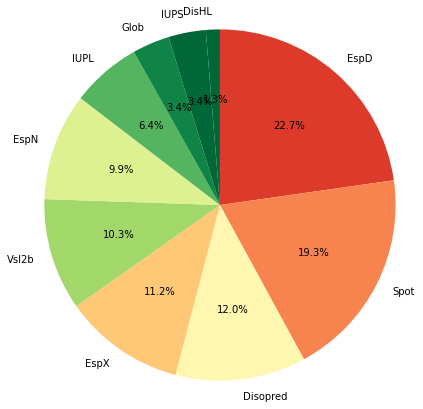

In [80]:
import matplotlib.pyplot as plt
import matplotlib
cmap = matplotlib.cm.get_cmap('RdYlGn')
Top_Performer = Top_Performer.sort_values(by=['Best Fraction'], ascending=False)
labels =Top_Performer.iloc[:,(0)].values
sizes = Top_Performer.iloc[:,(1)].values
colorcodes=Top_Performer.iloc[:,(2)].values
explode = (0.0, 0.0, 0.0, 0.0,0.0,0.0,0.0,0.0,0.0,0.0)  
colorbar=[cmap(colorcodes[0]),cmap(colorcodes[1]),cmap(colorcodes[2]),cmap(colorcodes[3]),cmap(colorcodes[4]),cmap(colorcodes[5]),cmap(colorcodes[6]),cmap(colorcodes[7]),cmap(colorcodes[8]),cmap(colorcodes[9])]
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90,counterclock=False,colors=colorbar)
ax1.axis('equal')  
#plt.savefig('BestFraction_OriProt.tiff', bbox_inches='tight',quality =50,orientation ='portrait',dpi =400)
plt.show()

# Disorder Fraction Distributions in each subset of functional proteins

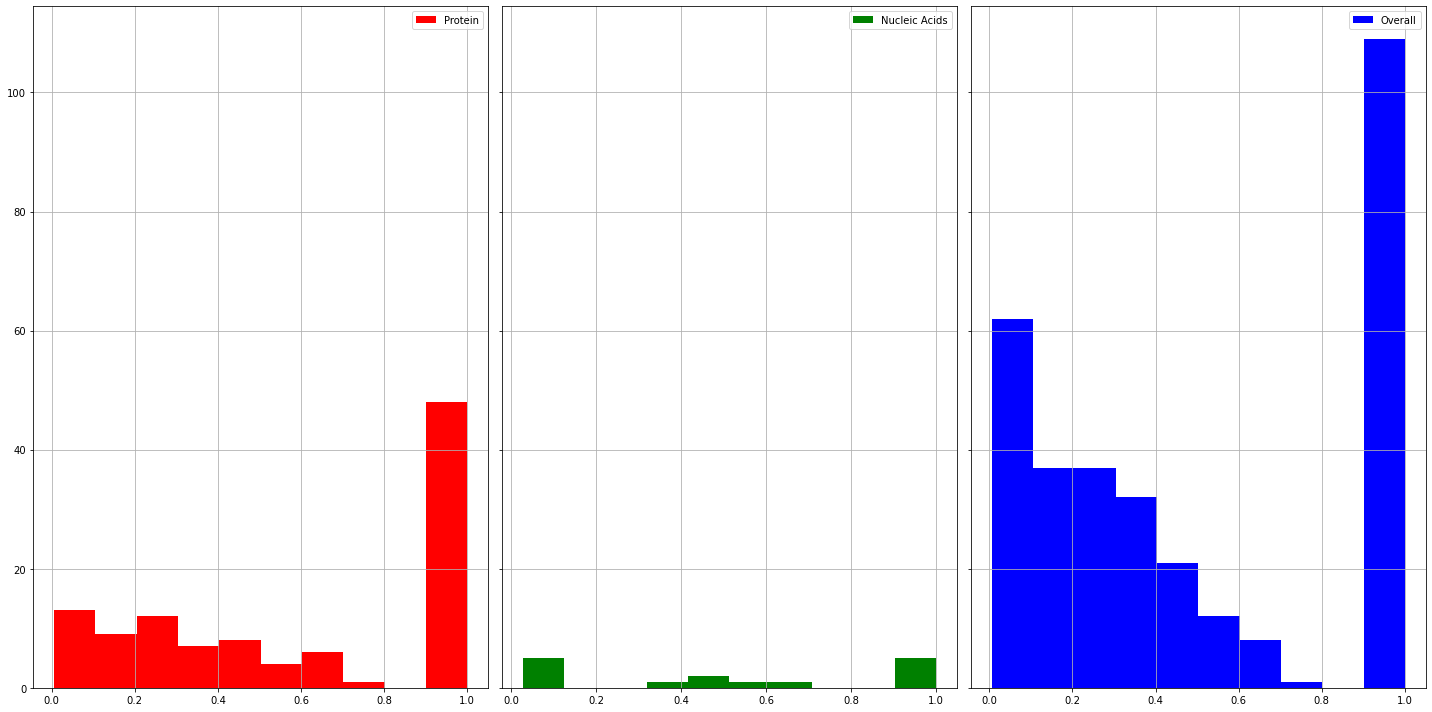

In [81]:
import matplotlib.pyplot as plt
n_bins = 10
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True, figsize=(20,10))
axs[0].hist(Protein_Fractions, bins=n_bins,color='r',label='Protein')
axs[0].grid()
axs[0].legend()
axs[1].hist(NUC_Fractions, bins=n_bins,color='g',label='Nucleic Acids')
axs[1].grid()
axs[1].legend()
axs[2].hist(Normal_Fractions, bins=n_bins,color='b',label='Overall')
plt.grid()
axs[2].legend()
#plt.savefig('ContentDistribution_157.tiff', bbox_inches='tight',quality =50,orientation ='portrait',dpi =400)
plt.show()

In [82]:
print(np.median(Normal_Fractions))
print(np.median(Protein_Fractions))
print(np.median(NUC_Fractions))

0.37890625
0.6176892201834863
0.4857142857142857


In [83]:
from scipy.stats import ks_2samp
Comb_Dist=[Protein_Fractions,NUC_Fractions,Normal_Fractions]
KS=[]
b=0
for b in range(0,len(Comb_Dist),1):
    p_value=[]
    c=0
    for c in range(0,len(Comb_Dist),1):
        ks,p=ks_2samp(Comb_Dist[b],Comb_Dist[c])
        p_value.append(p)
    KS.append(p_value)

In [84]:
JABU = pd.DataFrame(KS)
JABU 

,0,1,2
0,1.000000,0.368527,0.034278
1,0.368527,1.000000,0.636650
2,0.034278,0.636650,1.000000


In [85]:
Original_Distributions=pd.DataFrame({'Protein_Fractions':pd.Series(Protein_Fractions),                
                                     'NUC_Fractions':pd.Series(NUC_Fractions),
                                     'Normal_Fractions':pd.Series(Normal_Fractions)})   
Original_Distributions

,Protein_Fractions,NUC_Fractions,Normal_Fractions
0,1.000000,1.000000,1.000000
1,1.000000,0.536232,1.000000
2,0.033333,0.485714,1.000000
3,0.208955,0.398734,1.000000
4,0.536232,1.000000,0.033333
...,...,...,...
314,NaN,NaN,0.057143
315,NaN,NaN,0.028412
316,NaN,NaN,0.024788
317,NaN,NaN,0.028926


In [86]:
#Original_Distributions.to_csv('Refined_OriginalDistributions3.csv')

In [87]:
import random
import scipy
AUC_319=[
0.259,
0.272,
0.311,
0.348,
0.338,
0.361,
0.346,
0.385,
0.317
]
AUC_Prev=[
0.267,
0.369,
0.377,
0.377,
0.360,
0.462,
0.454,
0.416,
0.339
]
AUC_286=[
0.257,
0.283,
0.317,
0.373,
0.386,
0.390,
0.366,
0.473,
0.519
]
AUC_248=[
0.245,
0.240,
0.344,
0.407,
0.365,
0.378,
0.400,
0.494,
0.340
]

Sample_List=[AUC_319, AUC_Prev, AUC_286, AUC_248]
P_Values=[]
b=0
for b in range(0,len(Sample_List),1):
             A=Sample_List[b]
             line_P=[]
             c=0
             for c in range(0,len(Sample_List),1):
                         B=Sample_List[c]
                         test_stat, critical_values, siglevel = scipy.stats.anderson(A, 'norm')
                         is_normal_A = test_stat < critical_values[2]
                         test_stat, critical_values, siglevel = scipy.stats.anderson(B, 'norm')
                         is_normal_B = test_stat < critical_values[2]
                         if is_normal_A and is_normal_B:
                               # if both of them are normally distributed, we use t-test
                               test_stat, p_val = scipy.stats.ttest_ind(A, B)
                         else:
                             # else we do Anderson-Darling rank-sum test
                             t_stat, p_val = scipy.stats.ranksums(A, B)
                         line_P.append(p_val)
             P_Values.append(line_P)
            
Significance=pd.DataFrame({'319':P_Values[0],
                          'Prev':P_Values[1],
                          '286':P_Values[2],
                          '248':P_Values[3]})
Significance

,319,Prev,286,248
0,1.000000,0.040538,0.147498,0.318083
1,0.040538,1.000000,0.856068,0.494833
2,0.147498,0.856068,1.000000,0.668961
3,0.318083,0.494833,0.668961,1.000000


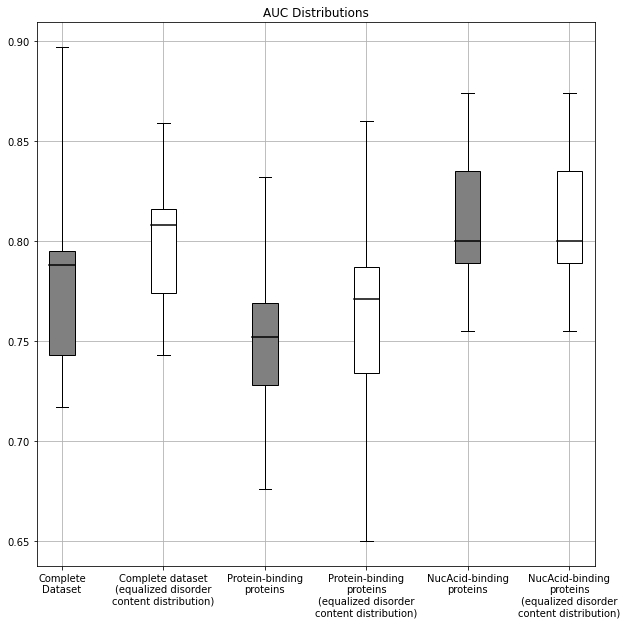

In [98]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
AUC_Full=[0.717,	0.858,	0.743,	0.790,		0.785,	0.788,	0.897,	0.724,	0.795]
AUC_Modified=[0.746,	0.859,	0.774,	0.816,		0.809,	0.801,	0.808,	0.743,	0.819]

AUCProt_Full=[0.683,	0.832,	0.728,	0.77,		0.769,	0.752,	0.756,	0.676,	0.743]
AUCProt_Modified=[0.703,	0.860,	0.745,	0.796,		0.787,	0.771,	0.777,	0.650,	0.734]

AUCNUC_Full=[0.789,0.755,0.757,0.800,0.796,0.804,0.835,0.874,0.843]
AUCNUC_Modified=[0.789,0.755,0.757,0.800,0.796,0.804,0.835,0.874,0.843]
data=[AUC_Full, AUC_Modified, AUCProt_Full, AUCProt_Modified, AUCNUC_Full, AUCNUC_Modified ]
medianprops = dict(color="black",linewidth=1.5)
box = plt.boxplot(data, 
           showfliers=False,
           whis=10,
           patch_artist=True,
            positions=[0,2,4,6,8,10],
           medianprops =medianprops,
           labels=['Complete\nDataset',
                   'Complete dataset\n(equalized disorder\ncontent distribution)',
                   'Protein-binding\nproteins',
                   'Protein-binding\nproteins\n(equalized disorder\ncontent distribution)',
                   'NucAcid-binding\nproteins',
                   'NucAcid-binding\nproteins\n(equalized disorder\ncontent distribution)'])

colors = [ 'grey', 'white', 'grey', 'white', 'grey', 'white']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.title('AUC Distributions')
plt.grid()
plt.savefig('AUC_Contentmodification-Alt.tiff', bbox_inches='tight',quality =95,orientation ='landscape',dpi =800)
plt.show()

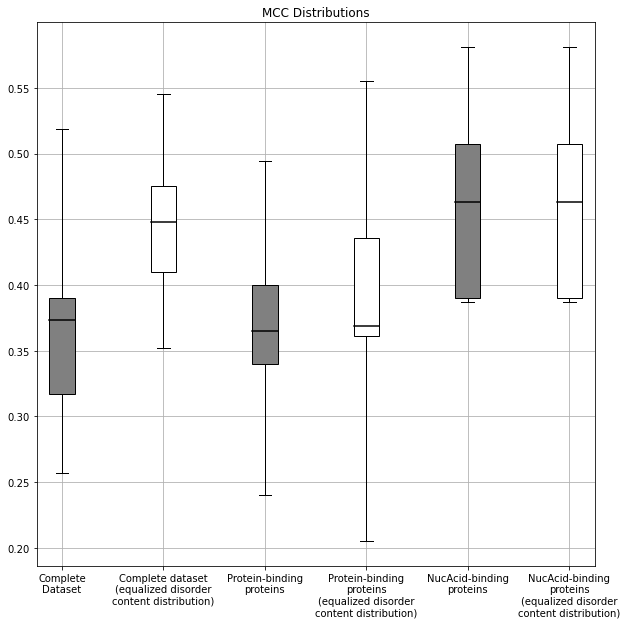

In [99]:
fig = plt.figure(figsize=(10,10))
MCC_Full=[0.257,	0.473,	0.317,	0.366,	0.373,	0.386,	0.519,	0.283,	0.390]
MCC_Modified=[0.357,	0.545,	0.415,	0.475,	0.472,	0.448,	0.410,	0.352,	0.478]

MCCProt_Full=[0.245,	0.494,	0.344,	0.4,0.407,	0.365,	0.34,	0.24,	0.378]
MCCProt_Modified=[0.286,	0.555,	0.369,	0.436,	0.440,	0.394,	0.361,	0.205,	0.363]

MCCNUC_Full=[0.507,	0.388,	0.390,	0.437,	0.387,	0.463,	0.536,	0.581,	0.466]
MCCNUC_Modified=[0.507,	0.388,	0.390,	0.437,	0.387,	0.463,	0.536,	0.581,	0.466]
data=[MCC_Full, MCC_Modified, MCCProt_Full, MCCProt_Modified, MCCNUC_Full,MCCNUC_Modified  ]
medianprops = dict(color="black",linewidth=1.5)
box = plt.boxplot(data, 
           showfliers=False,
           whis=10,
           patch_artist=True,
            positions=[0,2,4,6,8,10],
           medianprops =medianprops,
           labels=['Complete\nDataset',
                   'Complete dataset\n(equalized disorder\ncontent distribution)',
                   'Protein-binding\nproteins',
                   'Protein-binding\nproteins\n(equalized disorder\ncontent distribution)',
                   'NucAcid-binding\nproteins',
                   'NucAcid-binding\nproteins\n(equalized disorder\ncontent distribution)'])

colors = [ 'grey', 'white', 'grey', 'white', 'grey', 'white']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.title('MCC Distributions')
plt.grid()
plt.savefig('MCC_Contentmodification-Alt.tiff', bbox_inches='tight',quality =95,orientation ='landscape',dpi =800)
plt.show()

In [90]:
A=[0.553,
0.703,
0.708,
0.727,
0.751,
0.751,
0.757,
0.758,
0.792,
0.753
]
B=[0.615,
0.704,
0.766,
0.767,
0.757,
0.755,
0.792,
0.804,
0.815,
0.767]
test_stat, critical_values, siglevel = scipy.stats.anderson(A, 'norm')
is_normal_A = test_stat < critical_values[2]
test_stat, critical_values, siglevel = scipy.stats.anderson(B, 'norm')
is_normal_B = test_stat < critical_values[2]
if is_normal_A == True :
            print('A is normal')
if is_normal_B == True :
            print('B is normal')
if is_normal_A and is_normal_B:
   # if both of them are normally distributed, we use t-test
   test_stat, p_val = scipy.stats.ttest_ind(A, B)
   print('yes')
else:
  # else we do Anderson-Darling rank-sum test
  t_stat, p_val = scipy.stats.ranksums(A, B)
  
p_val

0.06964240479832813